## White Wine Review

In [1]:
#import all libraries

import numpy as np
import pandas as pd

from IPython.display import display, HTML, SVG, Image, IFrame

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

from yellowbrick.features import rank2d

In [2]:
# import csv for red
# https://stackoverflow.com/questions/24606330/how-to-read-a-file-with-a-semi-colon-separator-in-pandas
white_wines = pd.read_csv("winequality-white.csv", sep=";")
white_wines

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [3]:
white_wines.corr().replace().round(3).style.background_gradient('RdBu_r')

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.023000,0.289000,0.089000,0.023000,-0.049000,0.091000,0.265000,-0.426000,-0.017000,-0.121000,-0.114000
volatile acidity,-0.023000,1.000000,-0.149000,0.064000,0.071000,-0.097000,0.089000,0.027000,-0.032000,-0.036000,0.068000,-0.195000
citric acid,0.289000,-0.149000,1.000000,0.094000,0.114000,0.094000,0.121000,0.150000,-0.164000,0.062000,-0.076000,-0.009000
residual sugar,0.089000,0.064000,0.094000,1.000000,0.089000,0.299000,0.401000,0.839000,-0.194000,-0.027000,-0.451000,-0.098000
chlorides,0.023000,0.071000,0.114000,0.089000,1.000000,0.101000,0.199000,0.257000,-0.090000,0.017000,-0.360000,-0.210000
free sulfur dioxide,-0.049000,-0.097000,0.094000,0.299000,0.101000,1.000000,0.616000,0.294000,-0.001000,0.059000,-0.250000,0.008000
total sulfur dioxide,0.091000,0.089000,0.121000,0.401000,0.199000,0.616000,1.000000,0.530000,0.002000,0.135000,-0.449000,-0.175000
density,0.265000,0.027000,0.150000,0.839000,0.257000,0.294000,0.530000,1.000000,-0.094000,0.074000,-0.780000,-0.307000
pH,-0.426000,-0.032000,-0.164000,-0.194000,-0.090000,-0.001000,0.002000,-0.094000,1.000000,0.156000,0.121000,0.099000
sulphates,-0.017000,-0.036000,0.062000,-0.027000,0.017000,0.059000,0.135000,0.074000,0.156000,1.000000,-0.017000,0.054000


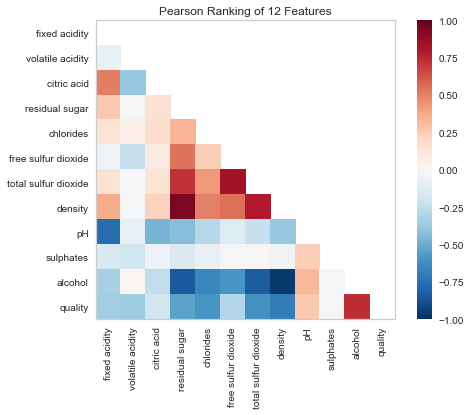

In [4]:
visualizer = rank2d(white_wines.corr())

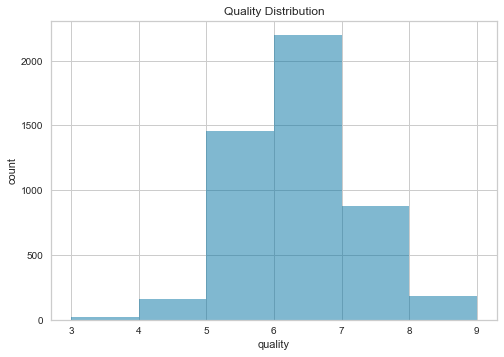

In [17]:
plt.hist(white_wines.quality, bins=6, alpha=.5)
plt.xlabel("quality")
plt.ylabel("count")
plt.title("Quality Distribution")
plt.show()

In [6]:
white_wines.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [15]:
white_wines.corr()['quality']

fixed acidity          -0.113663
volatile acidity       -0.194723
citric acid            -0.009209
residual sugar         -0.097577
chlorides              -0.209934
free sulfur dioxide     0.008158
total sulfur dioxide   -0.174737
density                -0.307123
pH                      0.099427
sulphates               0.053678
alcohol                 0.435575
quality                 1.000000
Name: quality, dtype: float64

In [7]:
# Assign X & y

X = white_wines.drop(["quality"], axis=1)
y= white_wines.quality

In [8]:
# create train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [9]:
# pre-processing (scale data)
# starting with standard scaler and will try minmaxscaler later

X_scaler= StandardScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Train the Model

In [10]:
classifier = LogisticRegression()
classifier.fit(X_train_scaled, y_train)
predictions = classifier.predict(X_test_scaled)
print(predictions)
print(classifier.classes_)

[6 6 6 ... 6 6 6]
[3 4 5 6 7 8 9]


C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [11]:
print(f"Training Data Score: {classifier.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test_scaled, y_test)}")

Training Data Score: 0.5507759324802614
Testing Data Score: 0.5257142857142857


In [12]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         7
           4       0.50      0.03      0.06        32
           5       0.56      0.52      0.54       358
           6       0.51      0.73      0.60       544
           7       0.53      0.24      0.33       241
           8       0.00      0.00      0.00        43
           9       0.00      0.00      0.00         0

    accuracy                           0.53      1225
   macro avg       0.30      0.22      0.22      1225
weighted avg       0.51      0.53      0.49      1225



C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [13]:
from sklearn.metrics import plot_confusion_matrix

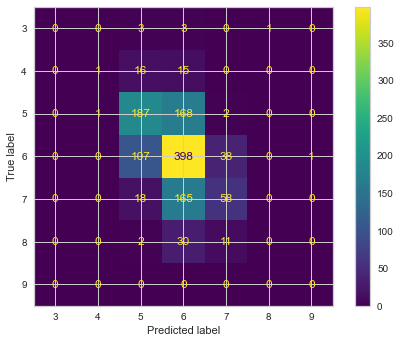

In [14]:
plot_confusion_matrix(classifier, X_test_scaled, y_test)

## Hyper Parameter Tuning

In [18]:
param_grid = {'C': [.01, 1, 10, 100, 250],
               'max_iter': [10,50,100,200,250,400],
               'penalty': ['elasticnet', 'l1', 'l2','none'],
               'dual': [True, False],
               'fit_intercept': [True, False],
               'class_weight': ['dict', 'balanced']
             }
grid = GridSearchCV(classifier, param_grid, verbose=3,)

In [19]:
grid.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 960 candidates, totalling 4800 fits
[CV] C=0.01, class_weight=dict, dual=True, fit_intercept=True, max_iter=10, penalty=elasticnet 
[CV]  C=0.01, class_weight=dict, dual=True, fit_intercept=True, max_iter=10, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=0.01, class_weight=dict, dual=True, fit_intercept=True, max_iter=10, penalty=elasticnet 
[CV]  C=0.01, class_weight=dict, dual=True, fit_intercept=True, max_iter=10, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=0.01, class_weight=dict, dual=True, fit_intercept=True, max_iter=10, penalty=elasticnet 
[CV]  C=0.01, class_weight=dict, dual=True, fit_intercept=True, max_iter=10, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=0.01, class_weight=dict, dual=True, fit_intercept=True, max_iter=10, penalty=elasticnet 
[CV]  C=0.01, class_weight=dict, dual=True, fit_intercept=True, max_iter=10, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=0.01, class_weight=dict, dual=True, fit_intercept=True, m

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)


[CV]  C=0.01, class_weight=dict, dual=True, fit_intercept=False, max_iter=100, penalty=l1, score=nan, total=   0.0s
[CV] C=0.01, class_weight=dict, dual=True, fit_intercept=False, max_iter=100, penalty=l1 
[CV]  C=0.01, class_weight=dict, dual=True, fit_intercept=False, max_iter=100, penalty=l1, score=nan, total=   0.0s
[CV] C=0.01, class_weight=dict, dual=True, fit_intercept=False, max_iter=100, penalty=l2 
[CV]  C=0.01, class_weight=dict, dual=True, fit_intercept=False, max_iter=100, penalty=l2, score=nan, total=   0.0s
[CV] C=0.01, class_weight=dict, dual=True, fit_intercept=False, max_iter=100, penalty=l2 
[CV]  C=0.01, class_weight=dict, dual=True, fit_intercept=False, max_iter=100, penalty=l2, score=nan, total=   0.0s
[CV] C=0.01, class_weight=dict, dual=True, fit_intercept=False, max_iter=100, penalty=l2 
[CV]  C=0.01, class_weight=dict, dual=True, fit_intercept=False, max_iter=100, penalty=l2, score=nan, total=   0.0s
[CV] C=0.01, class_weight=dict, dual=True, fit_intercept=Fal

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py", line 1417, in fit
    for class_, warm_start_coef_ in zip(classes_, warm_start_coef))
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packag

[CV]  C=0.01, class_weight=dict, dual=False, fit_intercept=True, max_iter=200, penalty=none, score=nan, total=   0.0s
[CV] C=0.01, class_weight=dict, dual=False, fit_intercept=True, max_iter=200, penalty=none 
[CV]  C=0.01, class_weight=dict, dual=False, fit_intercept=True, max_iter=200, penalty=none, score=nan, total=   0.0s
[CV] C=0.01, class_weight=dict, dual=False, fit_intercept=True, max_iter=200, penalty=none 
[CV]  C=0.01, class_weight=dict, dual=False, fit_intercept=True, max_iter=200, penalty=none, score=nan, total=   0.0s
[CV] C=0.01, class_weight=dict, dual=False, fit_intercept=True, max_iter=200, penalty=none 
[CV]  C=0.01, class_weight=dict, dual=False, fit_intercept=True, max_iter=200, penalty=none, score=nan, total=   0.0s
[CV] C=0.01, class_weight=dict, dual=False, fit_intercept=True, max_iter=250, penalty=elasticnet 
[CV]  C=0.01, class_weight=dict, dual=False, fit_intercept=True, max_iter=250, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=0.01, class_weight=dict

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py", line 1417, in fit
    for class_, warm_start_coef_ in zip(classes_, warm_start_coef))
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packag

[CV]  C=0.01, class_weight=dict, dual=False, fit_intercept=False, max_iter=100, penalty=l1, score=nan, total=   0.0s
[CV] C=0.01, class_weight=dict, dual=False, fit_intercept=False, max_iter=100, penalty=l1 
[CV]  C=0.01, class_weight=dict, dual=False, fit_intercept=False, max_iter=100, penalty=l1, score=nan, total=   0.0s
[CV] C=0.01, class_weight=dict, dual=False, fit_intercept=False, max_iter=100, penalty=l1 
[CV]  C=0.01, class_weight=dict, dual=False, fit_intercept=False, max_iter=100, penalty=l1, score=nan, total=   0.0s
[CV] C=0.01, class_weight=dict, dual=False, fit_intercept=False, max_iter=100, penalty=l2 
[CV]  C=0.01, class_weight=dict, dual=False, fit_intercept=False, max_iter=100, penalty=l2, score=nan, total=   0.0s
[CV] C=0.01, class_weight=dict, dual=False, fit_intercept=False, max_iter=100, penalty=l2 
[CV]  C=0.01, class_weight=dict, dual=False, fit_intercept=False, max_iter=100, penalty=l2, score=nan, total=   0.0s
[CV] C=0.01, class_weight=dict, dual=False, fit_int

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py", line 1417, in fit
    for class_, warm_start_coef_ in zip(classes_, warm_start_coef))
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dis


[CV]  C=0.01, class_weight=balanced, dual=True, fit_intercept=True, max_iter=200, penalty=l1, score=nan, total=   0.0s
[CV] C=0.01, class_weight=balanced, dual=True, fit_intercept=True, max_iter=200, penalty=l1 
[CV]  C=0.01, class_weight=balanced, dual=True, fit_intercept=True, max_iter=200, penalty=l1, score=nan, total=   0.0s
[CV] C=0.01, class_weight=balanced, dual=True, fit_intercept=True, max_iter=200, penalty=l1 
[CV]  C=0.01, class_weight=balanced, dual=True, fit_intercept=True, max_iter=200, penalty=l1, score=nan, total=   0.0s
[CV] C=0.01, class_weight=balanced, dual=True, fit_intercept=True, max_iter=200, penalty=l1 
[CV]  C=0.01, class_weight=balanced, dual=True, fit_intercept=True, max_iter=200, penalty=l1, score=nan, total=   0.0s
[CV] C=0.01, class_weight=balanced, dual=True, fit_intercept=True, max_iter=200, penalty=l2 
[CV]  C=0.01, class_weight=balanced, dual=True, fit_intercept=True, max_iter=200, penalty=l2, score=nan, total=   0.0s
[CV] C=0.01, class_weight=balanc

[CV]  C=0.01, class_weight=balanced, dual=False, fit_intercept=True, max_iter=10, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=0.01, class_weight=balanced, dual=False, fit_intercept=True, max_iter=10, penalty=elasticnet 
[CV]  C=0.01, class_weight=balanced, dual=False, fit_intercept=True, max_iter=10, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=0.01, class_weight=balanced, dual=False, fit_intercept=True, max_iter=10, penalty=l1 
[CV]  C=0.01, class_weight=balanced, dual=False, fit_intercept=True, max_iter=10, penalty=l1, score=nan, total=   0.0s
[CV] C=0.01, class_weight=balanced, dual=False, fit_intercept=True, max_iter=10, penalty=l1 
[CV]  C=0.01, class_weight=balanced, dual=False, fit_intercept=True, max_iter=10, penalty=l1, score=nan, total=   0.0s
[CV] C=0.01, class_weight=balanced, dual=False, fit_intercept=True, max_iter=10, penalty=l1 
[CV]  C=0.01, class_weight=balanced, dual=False, fit_intercept=True, max_iter=10, penalty=l1, score=nan, total=   0.0s
[CV] C=0.

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/

[CV]  C=0.01, class_weight=balanced, dual=False, fit_intercept=True, max_iter=10, penalty=none, score=0.312, total=   0.0s
[CV] C=0.01, class_weight=balanced, dual=False, fit_intercept=True, max_iter=50, penalty=elasticnet 
[CV]  C=0.01, class_weight=balanced, dual=False, fit_intercept=True, max_iter=50, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=0.01, class_weight=balanced, dual=False, fit_intercept=True, max_iter=50, penalty=elasticnet 
[CV]  C=0.01, class_weight=balanced, dual=False, fit_intercept=True, max_iter=50, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=0.01, class_weight=balanced, dual=False, fit_intercept=True, max_iter=50, penalty=elasticnet 
[CV]  C=0.01, class_weight=balanced, dual=False, fit_intercept=True, max_iter=50, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=0.01, class_weight=balanced, dual=False, fit_intercept=True, max_iter=50, penalty=elasticnet 
[CV]  C=0.01, class_weight=balanced, dual=False, fit_intercept=True, max_iter=50, penalty=el

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C

[CV]  C=0.01, class_weight=balanced, dual=False, fit_intercept=True, max_iter=50, penalty=none, score=0.324, total=   0.1s
[CV] C=0.01, class_weight=balanced, dual=False, fit_intercept=True, max_iter=50, penalty=none 
[CV]  C=0.01, class_weight=balanced, dual=False, fit_intercept=True, max_iter=50, penalty=none, score=0.331, total=   0.1s
[CV] C=0.01, class_weight=balanced, dual=False, fit_intercept=True, max_iter=50, penalty=none 
[CV]  C=0.01, class_weight=balanced, dual=False, fit_intercept=True, max_iter=50, penalty=none, score=0.309, total=   0.1s
[CV] C=0.01, class_weight=balanced, dual=False, fit_intercept=True, max_iter=50, penalty=none 


C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number

[CV]  C=0.01, class_weight=balanced, dual=False, fit_intercept=True, max_iter=50, penalty=none, score=0.312, total=   0.1s
[CV] C=0.01, class_weight=balanced, dual=False, fit_intercept=True, max_iter=50, penalty=none 
[CV]  C=0.01, class_weight=balanced, dual=False, fit_intercept=True, max_iter=50, penalty=none, score=0.330, total=   0.1s
[CV] C=0.01, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, penalty=elasticnet 
[CV]  C=0.01, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=0.01, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, penalty=elasticnet 
[CV]  C=0.01, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=0.01, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, penalty=elasticnet 
[CV]  C=0.01, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, penalty=elasti

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C

[CV]  C=0.01, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, penalty=none, score=0.325, total=   0.1s
[CV] C=0.01, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, penalty=none 
[CV]  C=0.01, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, penalty=none, score=0.310, total=   0.1s
[CV] C=0.01, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, penalty=none 


C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number

[CV]  C=0.01, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, penalty=none, score=0.328, total=   0.2s
[CV] C=0.01, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, penalty=none 
[CV]  C=0.01, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, penalty=none, score=0.337, total=   0.1s
[CV] C=0.01, class_weight=balanced, dual=False, fit_intercept=True, max_iter=200, penalty=elasticnet 
[CV]  C=0.01, class_weight=balanced, dual=False, fit_intercept=True, max_iter=200, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=0.01, class_weight=balanced, dual=False, fit_intercept=True, max_iter=200, penalty=elasticnet 
[CV]  C=0.01, class_weight=balanced, dual=False, fit_intercept=True, max_iter=200, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=0.01, class_weight=balanced, dual=False, fit_intercept=True, max_iter=200, penalty=elasticnet 
[CV]  C=0.01, class_weight=balanced, dual=False, fit_intercept=True, max_iter=200, penalty=ela

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C

[CV]  C=0.01, class_weight=balanced, dual=False, fit_intercept=True, max_iter=200, penalty=none, score=0.320, total=   0.3s
[CV] C=0.01, class_weight=balanced, dual=False, fit_intercept=True, max_iter=200, penalty=none 


C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.01, class_weight=balanced, dual=False, fit_intercept=True, max_iter=200, penalty=none, score=0.314, total=   0.2s
[CV] C=0.01, class_weight=balanced, dual=False, fit_intercept=True, max_iter=200, penalty=none 


C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.01, class_weight=balanced, dual=False, fit_intercept=True, max_iter=200, penalty=none, score=0.312, total=   0.3s
[CV] C=0.01, class_weight=balanced, dual=False, fit_intercept=True, max_iter=200, penalty=none 


C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.01, class_weight=balanced, dual=False, fit_intercept=True, max_iter=200, penalty=none, score=0.317, total=   0.2s
[CV] C=0.01, class_weight=balanced, dual=False, fit_intercept=True, max_iter=200, penalty=none 


C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  

[CV]  C=0.01, class_weight=balanced, dual=False, fit_intercept=True, max_iter=200, penalty=none, score=0.331, total=   0.2s
[CV] C=0.01, class_weight=balanced, dual=False, fit_intercept=True, max_iter=250, penalty=elasticnet 
[CV]  C=0.01, class_weight=balanced, dual=False, fit_intercept=True, max_iter=250, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=0.01, class_weight=balanced, dual=False, fit_intercept=True, max_iter=250, penalty=elasticnet 
[CV]  C=0.01, class_weight=balanced, dual=False, fit_intercept=True, max_iter=250, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=0.01, class_weight=balanced, dual=False, fit_intercept=True, max_iter=250, penalty=elasticnet 
[CV]  C=0.01, class_weight=balanced, dual=False, fit_intercept=True, max_iter=250, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=0.01, class_weight=balanced, dual=False, fit_intercept=True, max_iter=250, penalty=elasticnet 
[CV]  C=0.01, class_weight=balanced, dual=False, fit_intercept=True, max_iter=250, p

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.01, class_weight=balanced, dual=False, fit_intercept=True, max_iter=250, penalty=none, score=0.321, total=   0.3s
[CV] C=0.01, class_weight=balanced, dual=False, fit_intercept=True, max_iter=250, penalty=none 


C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.01, class_weight=balanced, dual=False, fit_intercept=True, max_iter=250, penalty=none, score=0.318, total=   0.3s
[CV] C=0.01, class_weight=balanced, dual=False, fit_intercept=True, max_iter=250, penalty=none 


C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.01, class_weight=balanced, dual=False, fit_intercept=True, max_iter=250, penalty=none, score=0.310, total=   0.4s
[CV] C=0.01, class_weight=balanced, dual=False, fit_intercept=True, max_iter=250, penalty=none 


C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.01, class_weight=balanced, dual=False, fit_intercept=True, max_iter=250, penalty=none, score=0.316, total=   0.3s
[CV] C=0.01, class_weight=balanced, dual=False, fit_intercept=True, max_iter=250, penalty=none 


C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  

[CV]  C=0.01, class_weight=balanced, dual=False, fit_intercept=True, max_iter=250, penalty=none, score=0.331, total=   0.3s
[CV] C=0.01, class_weight=balanced, dual=False, fit_intercept=True, max_iter=400, penalty=elasticnet 
[CV]  C=0.01, class_weight=balanced, dual=False, fit_intercept=True, max_iter=400, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=0.01, class_weight=balanced, dual=False, fit_intercept=True, max_iter=400, penalty=elasticnet 
[CV]  C=0.01, class_weight=balanced, dual=False, fit_intercept=True, max_iter=400, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=0.01, class_weight=balanced, dual=False, fit_intercept=True, max_iter=400, penalty=elasticnet 
[CV]  C=0.01, class_weight=balanced, dual=False, fit_intercept=True, max_iter=400, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=0.01, class_weight=balanced, dual=False, fit_intercept=True, max_iter=400, penalty=elasticnet 
[CV]  C=0.01, class_weight=balanced, dual=False, fit_intercept=True, max_iter=400, p

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C

[CV]  C=0.01, class_weight=balanced, dual=False, fit_intercept=True, max_iter=400, penalty=none, score=0.320, total=   0.5s
[CV] C=0.01, class_weight=balanced, dual=False, fit_intercept=True, max_iter=400, penalty=none 


C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.01, class_weight=balanced, dual=False, fit_intercept=True, max_iter=400, penalty=none, score=0.318, total=   0.5s
[CV] C=0.01, class_weight=balanced, dual=False, fit_intercept=True, max_iter=400, penalty=none 


C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.01, class_weight=balanced, dual=False, fit_intercept=True, max_iter=400, penalty=none, score=0.312, total=   0.6s
[CV] C=0.01, class_weight=balanced, dual=False, fit_intercept=True, max_iter=400, penalty=none 
[CV]  C=0.01, class_weight=balanced, dual=False, fit_intercept=True, max_iter=400, penalty=none, score=0.319, total=   0.4s
[CV] C=0.01, class_weight=balanced, dual=False, fit_intercept=True, max_iter=400, penalty=none 


C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to na

[CV]  C=0.01, class_weight=balanced, dual=False, fit_intercept=True, max_iter=400, penalty=none, score=0.332, total=   0.6s
[CV] C=0.01, class_weight=balanced, dual=False, fit_intercept=False, max_iter=10, penalty=elasticnet 
[CV]  C=0.01, class_weight=balanced, dual=False, fit_intercept=False, max_iter=10, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=0.01, class_weight=balanced, dual=False, fit_intercept=False, max_iter=10, penalty=elasticnet 
[CV]  C=0.01, class_weight=balanced, dual=False, fit_intercept=False, max_iter=10, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=0.01, class_weight=balanced, dual=False, fit_intercept=False, max_iter=10, penalty=elasticnet 
[CV]  C=0.01, class_weight=balanced, dual=False, fit_intercept=False, max_iter=10, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=0.01, class_weight=balanced, dual=False, fit_intercept=False, max_iter=10, penalty=elasticnet 
[CV]  C=0.01, class_weight=balanced, dual=False, fit_intercept=False, max_iter=10, p

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection

[CV]  C=0.01, class_weight=balanced, dual=False, fit_intercept=False, max_iter=50, penalty=none, score=0.195, total=   0.1s
[CV] C=0.01, class_weight=balanced, dual=False, fit_intercept=False, max_iter=50, penalty=none 
[CV]  C=0.01, class_weight=balanced, dual=False, fit_intercept=False, max_iter=50, penalty=none, score=0.222, total=   0.1s
[CV] C=0.01, class_weight=balanced, dual=False, fit_intercept=False, max_iter=50, penalty=none 
[CV]  C=0.01, class_weight=balanced, dual=False, fit_intercept=False, max_iter=50, penalty=none, score=0.201, total=   0.1s
[CV] C=0.01, class_weight=balanced, dual=False, fit_intercept=False, max_iter=50, penalty=none 


C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number

[CV]  C=0.01, class_weight=balanced, dual=False, fit_intercept=False, max_iter=50, penalty=none, score=0.222, total=   0.1s
[CV] C=0.01, class_weight=balanced, dual=False, fit_intercept=False, max_iter=50, penalty=none 
[CV]  C=0.01, class_weight=balanced, dual=False, fit_intercept=False, max_iter=50, penalty=none, score=0.170, total=   0.1s
[CV] C=0.01, class_weight=balanced, dual=False, fit_intercept=False, max_iter=100, penalty=elasticnet 
[CV]  C=0.01, class_weight=balanced, dual=False, fit_intercept=False, max_iter=100, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=0.01, class_weight=balanced, dual=False, fit_intercept=False, max_iter=100, penalty=elasticnet 
[CV]  C=0.01, class_weight=balanced, dual=False, fit_intercept=False, max_iter=100, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=0.01, class_weight=balanced, dual=False, fit_intercept=False, max_iter=100, penalty=elasticnet 
[CV]  C=0.01, class_weight=balanced, dual=False, fit_intercept=False, max_iter=100, penal

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV] C=0.01, class_weight=balanced, dual=False, fit_intercept=False, max_iter=100, penalty=none 
[CV]  C=0.01, class_weight=balanced, dual=False, fit_intercept=False, max_iter=100, penalty=none, score=0.201, total=   0.1s
[CV] C=0.01, class_weight=balanced, dual=False, fit_intercept=False, max_iter=100, penalty=none 
[CV]  C=0.01, class_weight=balanced, dual=False, fit_intercept=False, max_iter=100, penalty=none, score=0.222, total=   0.1s


C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV] C=0.01, class_weight=balanced, dual=False, fit_intercept=False, max_iter=100, penalty=none 
[CV]  C=0.01, class_weight=balanced, dual=False, fit_intercept=False, max_iter=100, penalty=none, score=0.168, total=   0.1s
[CV] C=0.01, class_weight=balanced, dual=False, fit_intercept=False, max_iter=200, penalty=elasticnet 
[CV]  C=0.01, class_weight=balanced, dual=False, fit_intercept=False, max_iter=200, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=0.01, class_weight=balanced, dual=False, fit_intercept=False, max_iter=200, penalty=elasticnet 
[CV]  C=0.01, class_weight=balanced, dual=False, fit_intercept=False, max_iter=200, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=0.01, class_weight=balanced, dual=False, fit_intercept=False, max_iter=200, penalty=elasticnet 
[CV]  C=0.01, class_weight=balanced, dual=False, fit_intercept=False, max_iter=200, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=0.01, class_weight=balanced, dual=False, fit_intercept=False, max_iter=200,

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver

[CV]  C=0.01, class_weight=balanced, dual=False, fit_intercept=False, max_iter=200, penalty=l2, score=0.199, total=   0.0s
[CV] C=0.01, class_weight=balanced, dual=False, fit_intercept=False, max_iter=200, penalty=l2 
[CV]  C=0.01, class_weight=balanced, dual=False, fit_intercept=False, max_iter=200, penalty=l2, score=0.218, total=   0.0s
[CV] C=0.01, class_weight=balanced, dual=False, fit_intercept=False, max_iter=200, penalty=l2 
[CV]  C=0.01, class_weight=balanced, dual=False, fit_intercept=False, max_iter=200, penalty=l2, score=0.191, total=   0.0s
[CV] C=0.01, class_weight=balanced, dual=False, fit_intercept=False, max_iter=200, penalty=none 
[CV]  C=0.01, class_weight=balanced, dual=False, fit_intercept=False, max_iter=200, penalty=none, score=0.195, total=   0.1s
[CV] C=0.01, class_weight=balanced, dual=False, fit_intercept=False, max_iter=200, penalty=none 


C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.01, class_weight=balanced, dual=False, fit_intercept=False, max_iter=200, penalty=none, score=0.222, total=   0.1s
[CV] C=0.01, class_weight=balanced, dual=False, fit_intercept=False, max_iter=200, penalty=none 
[CV]  C=0.01, class_weight=balanced, dual=False, fit_intercept=False, max_iter=200, penalty=none, score=0.201, total=   0.1s
[CV] C=0.01, class_weight=balanced, dual=False, fit_intercept=False, max_iter=200, penalty=none 


C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.01, class_weight=balanced, dual=False, fit_intercept=False, max_iter=200, penalty=none, score=0.222, total=   0.1s
[CV] C=0.01, class_weight=balanced, dual=False, fit_intercept=False, max_iter=200, penalty=none 
[CV]  C=0.01, class_weight=balanced, dual=False, fit_intercept=False, max_iter=200, penalty=none, score=0.168, total=   0.1s
[CV] C=0.01, class_weight=balanced, dual=False, fit_intercept=False, max_iter=250, penalty=elasticnet 
[CV]  C=0.01, class_weight=balanced, dual=False, fit_intercept=False, max_iter=250, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=0.01, class_weight=balanced, dual=False, fit_intercept=False, max_iter=250, penalty=elasticnet 
[CV]  C=0.01, class_weight=balanced, dual=False, fit_intercept=False, max_iter=250, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=0.01, class_weight=balanced, dual=False, fit_intercept=False, max_iter=250, penalty=elasticnet 
[CV]  C=0.01, class_weight=balanced, dual=False, fit_intercept=False, max_iter=250, pe

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver

[CV]  C=0.01, class_weight=balanced, dual=False, fit_intercept=False, max_iter=250, penalty=l2, score=0.218, total=   0.0s
[CV] C=0.01, class_weight=balanced, dual=False, fit_intercept=False, max_iter=250, penalty=l2 
[CV]  C=0.01, class_weight=balanced, dual=False, fit_intercept=False, max_iter=250, penalty=l2, score=0.191, total=   0.0s
[CV] C=0.01, class_weight=balanced, dual=False, fit_intercept=False, max_iter=250, penalty=none 
[CV]  C=0.01, class_weight=balanced, dual=False, fit_intercept=False, max_iter=250, penalty=none, score=0.195, total=   0.1s
[CV] C=0.01, class_weight=balanced, dual=False, fit_intercept=False, max_iter=250, penalty=none 


C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.01, class_weight=balanced, dual=False, fit_intercept=False, max_iter=250, penalty=none, score=0.222, total=   0.1s
[CV] C=0.01, class_weight=balanced, dual=False, fit_intercept=False, max_iter=250, penalty=none 
[CV]  C=0.01, class_weight=balanced, dual=False, fit_intercept=False, max_iter=250, penalty=none, score=0.201, total=   0.1s
[CV] C=0.01, class_weight=balanced, dual=False, fit_intercept=False, max_iter=250, penalty=none 
[CV]  C=0.01, class_weight=balanced, dual=False, fit_intercept=False, max_iter=250, penalty=none, score=0.222, total=   0.1s
[CV] C=0.01, class_weight=balanced, dual=False, fit_intercept=False, max_iter=250, penalty=none 


C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\jfors\anaco

[CV]  C=0.01, class_weight=balanced, dual=False, fit_intercept=False, max_iter=250, penalty=none, score=0.168, total=   0.1s
[CV] C=0.01, class_weight=balanced, dual=False, fit_intercept=False, max_iter=400, penalty=elasticnet 
[CV]  C=0.01, class_weight=balanced, dual=False, fit_intercept=False, max_iter=400, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=0.01, class_weight=balanced, dual=False, fit_intercept=False, max_iter=400, penalty=elasticnet 
[CV]  C=0.01, class_weight=balanced, dual=False, fit_intercept=False, max_iter=400, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=0.01, class_weight=balanced, dual=False, fit_intercept=False, max_iter=400, penalty=elasticnet 
[CV]  C=0.01, class_weight=balanced, dual=False, fit_intercept=False, max_iter=400, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=0.01, class_weight=balanced, dual=False, fit_intercept=False, max_iter=400, penalty=elasticnet 
[CV]  C=0.01, class_weight=balanced, dual=False, fit_intercept=False, max_it

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.01, class_weight=balanced, dual=False, fit_intercept=False, max_iter=400, penalty=none, score=0.195, total=   0.1s
[CV] C=0.01, class_weight=balanced, dual=False, fit_intercept=False, max_iter=400, penalty=none 
[CV]  C=0.01, class_weight=balanced, dual=False, fit_intercept=False, max_iter=400, penalty=none, score=0.222, total=   0.1s
[CV] C=0.01, class_weight=balanced, dual=False, fit_intercept=False, max_iter=400, penalty=none 


C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.01, class_weight=balanced, dual=False, fit_intercept=False, max_iter=400, penalty=none, score=0.201, total=   0.1s
[CV] C=0.01, class_weight=balanced, dual=False, fit_intercept=False, max_iter=400, penalty=none 
[CV]  C=0.01, class_weight=balanced, dual=False, fit_intercept=False, max_iter=400, penalty=none, score=0.222, total=   0.1s
[CV] C=0.01, class_weight=balanced, dual=False, fit_intercept=False, max_iter=400, penalty=none 
[CV]  C=0.01, class_weight=balanced, dual=False, fit_intercept=False, max_iter=400, penalty=none, score=0.168, total=   0.1s
[CV] C=1, class_weight=dict, dual=True, fit_intercept=True, max_iter=10, penalty=elasticnet 
[CV]  C=1, class_weight=dict, dual=True, fit_intercept=True, max_iter=10, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=1, class_weight=dict, dual=True, fit_intercept=True, max_iter=10, penalty=elasticnet 
[CV]  C=1, class_weight=dict, dual=True, fit_intercept=True, max_iter=10, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection

[CV]  C=1, class_weight=dict, dual=True, fit_intercept=False, max_iter=10, penalty=l2, score=nan, total=   0.0s
[CV] C=1, class_weight=dict, dual=True, fit_intercept=False, max_iter=10, penalty=l2 
[CV]  C=1, class_weight=dict, dual=True, fit_intercept=False, max_iter=10, penalty=l2, score=nan, total=   0.0s
[CV] C=1, class_weight=dict, dual=True, fit_intercept=False, max_iter=10, penalty=l2 
[CV]  C=1, class_weight=dict, dual=True, fit_intercept=False, max_iter=10, penalty=l2, score=nan, total=   0.0s
[CV] C=1, class_weight=dict, dual=True, fit_intercept=False, max_iter=10, penalty=l2 
[CV]  C=1, class_weight=dict, dual=True, fit_intercept=False, max_iter=10, penalty=l2, score=nan, total=   0.0s
[CV] C=1, class_weight=dict, dual=True, fit_intercept=False, max_iter=10, penalty=none 
[CV]  C=1, class_weight=dict, dual=True, fit_intercept=False, max_iter=10, penalty=none, score=nan, total=   0.0s
[CV] C=1, class_weight=dict, dual=True, fit_intercept=False, max_iter=10, penalty=none 
[CV]

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py", line 1417, in fit
    for class_, warm_start_coef_ in zip(classes_, warm_start_coef))
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packag

[CV]  C=1, class_weight=dict, dual=False, fit_intercept=True, max_iter=10, penalty=none, score=nan, total=   0.0s
[CV] C=1, class_weight=dict, dual=False, fit_intercept=True, max_iter=10, penalty=none 
[CV]  C=1, class_weight=dict, dual=False, fit_intercept=True, max_iter=10, penalty=none, score=nan, total=   0.0s
[CV] C=1, class_weight=dict, dual=False, fit_intercept=True, max_iter=10, penalty=none 
[CV]  C=1, class_weight=dict, dual=False, fit_intercept=True, max_iter=10, penalty=none, score=nan, total=   0.0s
[CV] C=1, class_weight=dict, dual=False, fit_intercept=True, max_iter=10, penalty=none 
[CV]  C=1, class_weight=dict, dual=False, fit_intercept=True, max_iter=10, penalty=none, score=nan, total=   0.0s
[CV] C=1, class_weight=dict, dual=False, fit_intercept=True, max_iter=50, penalty=elasticnet 
[CV]  C=1, class_weight=dict, dual=False, fit_intercept=True, max_iter=50, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=1, class_weight=dict, dual=False, fit_intercept=True, max_i

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py", line 1417, in fit
    for class_, warm_start_coef_ in zip(classes_, warm_start_coef))
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packag

[CV]  C=1, class_weight=dict, dual=False, fit_intercept=True, max_iter=250, penalty=l1, score=nan, total=   0.0s
[CV] C=1, class_weight=dict, dual=False, fit_intercept=True, max_iter=250, penalty=l1 
[CV]  C=1, class_weight=dict, dual=False, fit_intercept=True, max_iter=250, penalty=l1, score=nan, total=   0.0s
[CV] C=1, class_weight=dict, dual=False, fit_intercept=True, max_iter=250, penalty=l1 
[CV]  C=1, class_weight=dict, dual=False, fit_intercept=True, max_iter=250, penalty=l1, score=nan, total=   0.0s
[CV] C=1, class_weight=dict, dual=False, fit_intercept=True, max_iter=250, penalty=l2 
[CV]  C=1, class_weight=dict, dual=False, fit_intercept=True, max_iter=250, penalty=l2, score=nan, total=   0.0s
[CV] C=1, class_weight=dict, dual=False, fit_intercept=True, max_iter=250, penalty=l2 
[CV]  C=1, class_weight=dict, dual=False, fit_intercept=True, max_iter=250, penalty=l2, score=nan, total=   0.0s
[CV] C=1, class_weight=dict, dual=False, fit_intercept=True, max_iter=250, penalty=l2 


C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py", line 1417, in fit
    for class_, warm_start_coef_ in zip(classes_, warm_start_coef))
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packag

[CV]  C=1, class_weight=dict, dual=False, fit_intercept=False, max_iter=50, penalty=none, score=nan, total=   0.0s
[CV] C=1, class_weight=dict, dual=False, fit_intercept=False, max_iter=50, penalty=none 
[CV]  C=1, class_weight=dict, dual=False, fit_intercept=False, max_iter=50, penalty=none, score=nan, total=   0.0s
[CV] C=1, class_weight=dict, dual=False, fit_intercept=False, max_iter=50, penalty=none 
[CV]  C=1, class_weight=dict, dual=False, fit_intercept=False, max_iter=50, penalty=none, score=nan, total=   0.0s
[CV] C=1, class_weight=dict, dual=False, fit_intercept=False, max_iter=50, penalty=none 
[CV]  C=1, class_weight=dict, dual=False, fit_intercept=False, max_iter=50, penalty=none, score=nan, total=   0.0s
[CV] C=1, class_weight=dict, dual=False, fit_intercept=False, max_iter=100, penalty=elasticnet 
[CV]  C=1, class_weight=dict, dual=False, fit_intercept=False, max_iter=100, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=1, class_weight=dict, dual=False, fit_intercept=

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py", line 1417, in fit
    for class_, warm_start_coef_ in zip(classes_, warm_start_coef))
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packag

[CV]  C=1, class_weight=dict, dual=False, fit_intercept=False, max_iter=400, penalty=l2, score=nan, total=   0.0s
[CV] C=1, class_weight=dict, dual=False, fit_intercept=False, max_iter=400, penalty=l2 
[CV]  C=1, class_weight=dict, dual=False, fit_intercept=False, max_iter=400, penalty=l2, score=nan, total=   0.0s
[CV] C=1, class_weight=dict, dual=False, fit_intercept=False, max_iter=400, penalty=none 
[CV]  C=1, class_weight=dict, dual=False, fit_intercept=False, max_iter=400, penalty=none, score=nan, total=   0.0s
[CV] C=1, class_weight=dict, dual=False, fit_intercept=False, max_iter=400, penalty=none 
[CV]  C=1, class_weight=dict, dual=False, fit_intercept=False, max_iter=400, penalty=none, score=nan, total=   0.0s
[CV] C=1, class_weight=dict, dual=False, fit_intercept=False, max_iter=400, penalty=none 
[CV]  C=1, class_weight=dict, dual=False, fit_intercept=False, max_iter=400, penalty=none, score=nan, total=   0.0s
[CV] C=1, class_weight=dict, dual=False, fit_intercept=False, max_

[CV]  C=1, class_weight=balanced, dual=True, fit_intercept=True, max_iter=400, penalty=l1, score=nan, total=   0.0s
[CV] C=1, class_weight=balanced, dual=True, fit_intercept=True, max_iter=400, penalty=l1 
[CV]  C=1, class_weight=balanced, dual=True, fit_intercept=True, max_iter=400, penalty=l1, score=nan, total=   0.0s
[CV] C=1, class_weight=balanced, dual=True, fit_intercept=True, max_iter=400, penalty=l2 
[CV]  C=1, class_weight=balanced, dual=True, fit_intercept=True, max_iter=400, penalty=l2, score=nan, total=   0.0s
[CV] C=1, class_weight=balanced, dual=True, fit_intercept=True, max_iter=400, penalty=l2 
[CV]  C=1, class_weight=balanced, dual=True, fit_intercept=True, max_iter=400, penalty=l2, score=nan, total=   0.0s
[CV] C=1, class_weight=balanced, dual=True, fit_intercept=True, max_iter=400, penalty=l2 
[CV]  C=1, class_weight=balanced, dual=True, fit_intercept=True, max_iter=400, penalty=l2, score=nan, total=   0.0s
[CV] C=1, class_weight=balanced, dual=True, fit_intercept=Tr

[CV]  C=1, class_weight=balanced, dual=True, fit_intercept=False, max_iter=400, penalty=l1, score=nan, total=   0.0s
[CV] C=1, class_weight=balanced, dual=True, fit_intercept=False, max_iter=400, penalty=l2 
[CV]  C=1, class_weight=balanced, dual=True, fit_intercept=False, max_iter=400, penalty=l2, score=nan, total=   0.0s
[CV] C=1, class_weight=balanced, dual=True, fit_intercept=False, max_iter=400, penalty=l2 
[CV]  C=1, class_weight=balanced, dual=True, fit_intercept=False, max_iter=400, penalty=l2, score=nan, total=   0.0s
[CV] C=1, class_weight=balanced, dual=True, fit_intercept=False, max_iter=400, penalty=l2 
[CV]  C=1, class_weight=balanced, dual=True, fit_intercept=False, max_iter=400, penalty=l2, score=nan, total=   0.0s
[CV] C=1, class_weight=balanced, dual=True, fit_intercept=False, max_iter=400, penalty=l2 
[CV]  C=1, class_weight=balanced, dual=True, fit_intercept=False, max_iter=400, penalty=l2, score=nan, total=   0.0s
[CV] C=1, class_weight=balanced, dual=True, fit_int

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/

[CV]  C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=10, penalty=none, score=0.288, total=   0.0s
[CV] C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=10, penalty=none 
[CV]  C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=10, penalty=none, score=0.304, total=   0.0s
[CV] C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=10, penalty=none 
[CV]  C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=10, penalty=none, score=0.312, total=   0.0s
[CV] C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=50, penalty=elasticnet 
[CV]  C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=50, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=50, penalty=elasticnet 
[CV]  C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=50, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=1, cl

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  

[CV]  C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=50, penalty=l2, score=0.318, total=   0.1s
[CV] C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=50, penalty=l2 
[CV]  C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=50, penalty=l2, score=0.302, total=   0.1s
[CV] C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=50, penalty=l2 
[CV]  C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=50, penalty=l2, score=0.316, total=   0.1s
[CV] C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=50, penalty=l2 


C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/

[CV]  C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=50, penalty=l2, score=0.323, total=   0.1s
[CV] C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=50, penalty=none 
[CV]  C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=50, penalty=none, score=0.324, total=   0.1s
[CV] C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=50, penalty=none 
[CV]  C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=50, penalty=none, score=0.331, total=   0.1s
[CV] C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=50, penalty=none 
[CV]  C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=50, penalty=none, score=0.309, total=   0.1s
[CV] C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=50, penalty=none 


C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/

[CV]  C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=50, penalty=none, score=0.312, total=   0.1s
[CV] C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=50, penalty=none 
[CV]  C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=50, penalty=none, score=0.330, total=   0.1s
[CV] C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, penalty=elasticnet 
[CV]  C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, penalty=elasticnet 
[CV]  C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, penalty=elasticnet 
[CV]  C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, penalty=elasticnet, score=nan, total=   0

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  

[CV]  C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, penalty=l2, score=0.327, total=   0.1s
[CV] C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, penalty=l2 
[CV]  C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, penalty=l2, score=0.324, total=   0.2s
[CV] C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, penalty=l2 


C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/

[CV]  C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, penalty=l2, score=0.305, total=   0.2s
[CV] C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, penalty=l2 
[CV]  C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, penalty=l2, score=0.313, total=   0.1s
[CV] C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, penalty=l2 


C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/

[CV]  C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, penalty=l2, score=0.326, total=   0.1s
[CV] C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, penalty=none 
[CV]  C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, penalty=none, score=0.321, total=   0.2s
[CV] C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, penalty=none 


C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/

[CV]  C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, penalty=none, score=0.325, total=   0.2s
[CV] C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, penalty=none 
[CV]  C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, penalty=none, score=0.310, total=   0.2s
[CV] C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, penalty=none 


C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/

[CV]  C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, penalty=none, score=0.328, total=   0.1s
[CV] C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, penalty=none 
[CV]  C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, penalty=none, score=0.337, total=   0.1s
[CV] C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=200, penalty=elasticnet 
[CV]  C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=200, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=200, penalty=elasticnet 
[CV]  C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=200, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=200, penalty=elasticnet 
[CV]  C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=200, penalty=elasticnet, score=nan, total= 

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  

[CV]  C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=200, penalty=l2, score=0.327, total=   0.1s
[CV] C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=200, penalty=l2 
[CV]  C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=200, penalty=l2, score=0.322, total=   0.2s
[CV] C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=200, penalty=l2 
[CV]  C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=200, penalty=l2, score=0.305, total=   0.2s
[CV] C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=200, penalty=l2 
[CV]  C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=200, penalty=l2, score=0.312, total=   0.2s
[CV] C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=200, penalty=l2 
[CV]  C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=200, penalty=l2, score=0.327, total=   0.2s
[CV] C=1, class_weight=balanced, dual=Fal

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=200, penalty=none, score=0.320, total=   0.3s
[CV] C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=200, penalty=none 


C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=200, penalty=none, score=0.314, total=   0.3s
[CV] C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=200, penalty=none 


C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=200, penalty=none, score=0.312, total=   0.3s
[CV] C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=200, penalty=none 


C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=200, penalty=none, score=0.317, total=   0.3s
[CV] C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=200, penalty=none 


C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  

[CV]  C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=200, penalty=none, score=0.331, total=   0.3s
[CV] C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=250, penalty=elasticnet 
[CV]  C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=250, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=250, penalty=elasticnet 
[CV]  C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=250, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=250, penalty=elasticnet 
[CV]  C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=250, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=250, penalty=elasticnet 
[CV]  C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=250, penalty=elasticnet, score=na

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=250, penalty=none, score=0.321, total=   0.3s
[CV] C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=250, penalty=none 


C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=250, penalty=none, score=0.318, total=   0.3s
[CV] C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=250, penalty=none 


C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=250, penalty=none, score=0.310, total=   0.3s
[CV] C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=250, penalty=none 


C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=250, penalty=none, score=0.316, total=   0.4s
[CV] C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=250, penalty=none 


C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  

[CV]  C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=250, penalty=none, score=0.331, total=   0.4s
[CV] C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=400, penalty=elasticnet 
[CV]  C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=400, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=400, penalty=elasticnet 
[CV]  C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=400, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=400, penalty=elasticnet 
[CV]  C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=400, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=400, penalty=elasticnet 
[CV]  C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=400, penalty=elasticnet, score=na

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=400, penalty=none, score=0.320, total=   0.6s
[CV] C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=400, penalty=none 


C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=400, penalty=none, score=0.318, total=   0.5s
[CV] C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=400, penalty=none 


C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=400, penalty=none, score=0.312, total=   0.5s
[CV] C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=400, penalty=none 
[CV]  C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=400, penalty=none, score=0.319, total=   0.4s
[CV] C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=400, penalty=none 


C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  

[CV]  C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=400, penalty=none, score=0.332, total=   0.5s
[CV] C=1, class_weight=balanced, dual=False, fit_intercept=False, max_iter=10, penalty=elasticnet 
[CV]  C=1, class_weight=balanced, dual=False, fit_intercept=False, max_iter=10, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=1, class_weight=balanced, dual=False, fit_intercept=False, max_iter=10, penalty=elasticnet 
[CV]  C=1, class_weight=balanced, dual=False, fit_intercept=False, max_iter=10, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=1, class_weight=balanced, dual=False, fit_intercept=False, max_iter=10, penalty=elasticnet 
[CV]  C=1, class_weight=balanced, dual=False, fit_intercept=False, max_iter=10, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=1, class_weight=balanced, dual=False, fit_intercept=False, max_iter=10, penalty=elasticnet 
[CV]  C=1, class_weight=balanced, dual=False, fit_intercept=False, max_iter=10, penalty=elasticnet, score=na

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.

[CV]  C=1, class_weight=balanced, dual=False, fit_intercept=False, max_iter=50, penalty=l2, score=0.193, total=   0.1s
[CV] C=1, class_weight=balanced, dual=False, fit_intercept=False, max_iter=50, penalty=l2 
[CV]  C=1, class_weight=balanced, dual=False, fit_intercept=False, max_iter=50, penalty=l2, score=0.218, total=   0.1s
[CV] C=1, class_weight=balanced, dual=False, fit_intercept=False, max_iter=50, penalty=l2 
[CV]  C=1, class_weight=balanced, dual=False, fit_intercept=False, max_iter=50, penalty=l2, score=0.172, total=   0.1s
[CV] C=1, class_weight=balanced, dual=False, fit_intercept=False, max_iter=50, penalty=none 


C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/

[CV]  C=1, class_weight=balanced, dual=False, fit_intercept=False, max_iter=50, penalty=none, score=0.195, total=   0.1s
[CV] C=1, class_weight=balanced, dual=False, fit_intercept=False, max_iter=50, penalty=none 
[CV]  C=1, class_weight=balanced, dual=False, fit_intercept=False, max_iter=50, penalty=none, score=0.222, total=   0.1s
[CV] C=1, class_weight=balanced, dual=False, fit_intercept=False, max_iter=50, penalty=none 
[CV]  C=1, class_weight=balanced, dual=False, fit_intercept=False, max_iter=50, penalty=none, score=0.201, total=   0.1s
[CV] C=1, class_weight=balanced, dual=False, fit_intercept=False, max_iter=50, penalty=none 
[CV]  C=1, class_weight=balanced, dual=False, fit_intercept=False, max_iter=50, penalty=none, score=0.222, total=   0.1s
[CV] C=1, class_weight=balanced, dual=False, fit_intercept=False, max_iter=50, penalty=none 
[CV]  C=1, class_weight=balanced, dual=False, fit_intercept=False, max_iter=50, penalty=none, score=0.170, total=   0.1s
[CV] C=1, class_weight=

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  

[CV]  C=1, class_weight=balanced, dual=False, fit_intercept=False, max_iter=100, penalty=l2, score=0.224, total=   0.1s
[CV] C=1, class_weight=balanced, dual=False, fit_intercept=False, max_iter=100, penalty=l2 
[CV]  C=1, class_weight=balanced, dual=False, fit_intercept=False, max_iter=100, penalty=l2, score=0.195, total=   0.1s
[CV] C=1, class_weight=balanced, dual=False, fit_intercept=False, max_iter=100, penalty=l2 
[CV]  C=1, class_weight=balanced, dual=False, fit_intercept=False, max_iter=100, penalty=l2, score=0.218, total=   0.1s
[CV] C=1, class_weight=balanced, dual=False, fit_intercept=False, max_iter=100, penalty=l2 
[CV]  C=1, class_weight=balanced, dual=False, fit_intercept=False, max_iter=100, penalty=l2, score=0.172, total=   0.1s
[CV] C=1, class_weight=balanced, dual=False, fit_intercept=False, max_iter=100, penalty=none 
[CV]  C=1, class_weight=balanced, dual=False, fit_intercept=False, max_iter=100, penalty=none, score=0.195, total=   0.1s
[CV] C=1, class_weight=balan

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection

[CV]  C=1, class_weight=balanced, dual=False, fit_intercept=False, max_iter=200, penalty=l2, score=0.224, total=   0.1s
[CV] C=1, class_weight=balanced, dual=False, fit_intercept=False, max_iter=200, penalty=l2 
[CV]  C=1, class_weight=balanced, dual=False, fit_intercept=False, max_iter=200, penalty=l2, score=0.195, total=   0.1s
[CV] C=1, class_weight=balanced, dual=False, fit_intercept=False, max_iter=200, penalty=l2 
[CV]  C=1, class_weight=balanced, dual=False, fit_intercept=False, max_iter=200, penalty=l2, score=0.218, total=   0.1s
[CV] C=1, class_weight=balanced, dual=False, fit_intercept=False, max_iter=200, penalty=l2 
[CV]  C=1, class_weight=balanced, dual=False, fit_intercept=False, max_iter=200, penalty=l2, score=0.172, total=   0.1s
[CV] C=1, class_weight=balanced, dual=False, fit_intercept=False, max_iter=200, penalty=none 
[CV]  C=1, class_weight=balanced, dual=False, fit_intercept=False, max_iter=200, penalty=none, score=0.195, total=   0.1s
[CV] C=1, class_weight=balan

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection

[CV]  C=1, class_weight=balanced, dual=False, fit_intercept=False, max_iter=250, penalty=l2, score=0.224, total=   0.1s
[CV] C=1, class_weight=balanced, dual=False, fit_intercept=False, max_iter=250, penalty=l2 
[CV]  C=1, class_weight=balanced, dual=False, fit_intercept=False, max_iter=250, penalty=l2, score=0.195, total=   0.1s
[CV] C=1, class_weight=balanced, dual=False, fit_intercept=False, max_iter=250, penalty=l2 
[CV]  C=1, class_weight=balanced, dual=False, fit_intercept=False, max_iter=250, penalty=l2, score=0.218, total=   0.1s
[CV] C=1, class_weight=balanced, dual=False, fit_intercept=False, max_iter=250, penalty=l2 
[CV]  C=1, class_weight=balanced, dual=False, fit_intercept=False, max_iter=250, penalty=l2, score=0.172, total=   0.1s
[CV] C=1, class_weight=balanced, dual=False, fit_intercept=False, max_iter=250, penalty=none 
[CV]  C=1, class_weight=balanced, dual=False, fit_intercept=False, max_iter=250, penalty=none, score=0.195, total=   0.1s
[CV] C=1, class_weight=balan

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection

[CV]  C=1, class_weight=balanced, dual=False, fit_intercept=False, max_iter=400, penalty=l2, score=0.195, total=   0.1s
[CV] C=1, class_weight=balanced, dual=False, fit_intercept=False, max_iter=400, penalty=l2 
[CV]  C=1, class_weight=balanced, dual=False, fit_intercept=False, max_iter=400, penalty=l2, score=0.218, total=   0.1s
[CV] C=1, class_weight=balanced, dual=False, fit_intercept=False, max_iter=400, penalty=l2 
[CV]  C=1, class_weight=balanced, dual=False, fit_intercept=False, max_iter=400, penalty=l2, score=0.172, total=   0.1s
[CV] C=1, class_weight=balanced, dual=False, fit_intercept=False, max_iter=400, penalty=none 
[CV]  C=1, class_weight=balanced, dual=False, fit_intercept=False, max_iter=400, penalty=none, score=0.195, total=   0.1s
[CV] C=1, class_weight=balanced, dual=False, fit_intercept=False, max_iter=400, penalty=none 
[CV]  C=1, class_weight=balanced, dual=False, fit_intercept=False, max_iter=400, penalty=none, score=0.222, total=   0.1s
[CV] C=1, class_weight=b

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection

[CV]  C=10, class_weight=dict, dual=True, fit_intercept=True, max_iter=10, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=10, class_weight=dict, dual=True, fit_intercept=True, max_iter=10, penalty=elasticnet 
[CV]  C=10, class_weight=dict, dual=True, fit_intercept=True, max_iter=10, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=10, class_weight=dict, dual=True, fit_intercept=True, max_iter=10, penalty=elasticnet 
[CV]  C=10, class_weight=dict, dual=True, fit_intercept=True, max_iter=10, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=10, class_weight=dict, dual=True, fit_intercept=True, max_iter=10, penalty=elasticnet 
[CV]  C=10, class_weight=dict, dual=True, fit_intercept=True, max_iter=10, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=10, class_weight=dict, dual=True, fit_intercept=True, max_iter=10, penalty=l1 
[CV]  C=10, class_weight=dict, dual=True, fit_intercept=True, max_iter=10, penalty=l1, score=nan, total=   0.0s
[CV] C=10, class_weight=dict, dual=True,

[CV]  C=10, class_weight=dict, dual=True, fit_intercept=False, max_iter=100, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=10, class_weight=dict, dual=True, fit_intercept=False, max_iter=100, penalty=elasticnet 
[CV]  C=10, class_weight=dict, dual=True, fit_intercept=False, max_iter=100, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=10, class_weight=dict, dual=True, fit_intercept=False, max_iter=100, penalty=elasticnet 
[CV]  C=10, class_weight=dict, dual=True, fit_intercept=False, max_iter=100, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=10, class_weight=dict, dual=True, fit_intercept=False, max_iter=100, penalty=elasticnet 
[CV]  C=10, class_weight=dict, dual=True, fit_intercept=False, max_iter=100, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=10, class_weight=dict, dual=True, fit_intercept=False, max_iter=100, penalty=l1 
[CV]  C=10, class_weight=dict, dual=True, fit_intercept=False, max_iter=100, penalty=l1, score=nan, total=   0.0s
[CV] C=10, class_weigh

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py", line 1417, in fit
    for class_, warm_start_coef_ in zip(classes_, warm_start_coef))
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packag

[CV] C=10, class_weight=dict, dual=False, fit_intercept=True, max_iter=100, penalty=l1 
[CV]  C=10, class_weight=dict, dual=False, fit_intercept=True, max_iter=100, penalty=l1, score=nan, total=   0.0s
[CV] C=10, class_weight=dict, dual=False, fit_intercept=True, max_iter=100, penalty=l1 
[CV]  C=10, class_weight=dict, dual=False, fit_intercept=True, max_iter=100, penalty=l1, score=nan, total=   0.0s
[CV] C=10, class_weight=dict, dual=False, fit_intercept=True, max_iter=100, penalty=l2 
[CV]  C=10, class_weight=dict, dual=False, fit_intercept=True, max_iter=100, penalty=l2, score=nan, total=   0.0s
[CV] C=10, class_weight=dict, dual=False, fit_intercept=True, max_iter=100, penalty=l2 
[CV]  C=10, class_weight=dict, dual=False, fit_intercept=True, max_iter=100, penalty=l2, score=nan, total=   0.0s
[CV] C=10, class_weight=dict, dual=False, fit_intercept=True, max_iter=100, penalty=l2 
[CV]  C=10, class_weight=dict, dual=False, fit_intercept=True, max_iter=100, penalty=l2, score=nan, tota

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py", line 1417, in fit
    for class_, warm_start_coef_ in zip(classes_, warm_start_coef))
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packag

[CV]  C=10, class_weight=dict, dual=False, fit_intercept=True, max_iter=400, penalty=none, score=nan, total=   0.0s
[CV] C=10, class_weight=dict, dual=False, fit_intercept=True, max_iter=400, penalty=none 
[CV]  C=10, class_weight=dict, dual=False, fit_intercept=True, max_iter=400, penalty=none, score=nan, total=   0.0s
[CV] C=10, class_weight=dict, dual=False, fit_intercept=True, max_iter=400, penalty=none 
[CV]  C=10, class_weight=dict, dual=False, fit_intercept=True, max_iter=400, penalty=none, score=nan, total=   0.0s
[CV] C=10, class_weight=dict, dual=False, fit_intercept=True, max_iter=400, penalty=none 
[CV]  C=10, class_weight=dict, dual=False, fit_intercept=True, max_iter=400, penalty=none, score=nan, total=   0.0s
[CV] C=10, class_weight=dict, dual=False, fit_intercept=False, max_iter=10, penalty=elasticnet 
[CV]  C=10, class_weight=dict, dual=False, fit_intercept=False, max_iter=10, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=10, class_weight=dict, dual=False, fit_in

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py", line 1417, in fit
    for class_, warm_start_coef_ in zip(classes_, warm_start_coef))
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dis


[CV]  C=10, class_weight=dict, dual=False, fit_intercept=False, max_iter=200, penalty=l2, score=nan, total=   0.0s
[CV] C=10, class_weight=dict, dual=False, fit_intercept=False, max_iter=200, penalty=l2 
[CV]  C=10, class_weight=dict, dual=False, fit_intercept=False, max_iter=200, penalty=l2, score=nan, total=   0.0s
[CV] C=10, class_weight=dict, dual=False, fit_intercept=False, max_iter=200, penalty=l2 
[CV]  C=10, class_weight=dict, dual=False, fit_intercept=False, max_iter=200, penalty=l2, score=nan, total=   0.0s
[CV] C=10, class_weight=dict, dual=False, fit_intercept=False, max_iter=200, penalty=l2 
[CV]  C=10, class_weight=dict, dual=False, fit_intercept=False, max_iter=200, penalty=l2, score=nan, total=   0.0s
[CV] C=10, class_weight=dict, dual=False, fit_intercept=False, max_iter=200, penalty=l2 
[CV]  C=10, class_weight=dict, dual=False, fit_intercept=False, max_iter=200, penalty=l2, score=nan, total=   0.0s
[CV] C=10, class_weight=dict, dual=False, fit_intercept=False, max_i

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py", line 1417, in fit
    for class_, warm_start_coef_ in zip(classes_, warm_start_coef))
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dis

[CV]  C=10, class_weight=balanced, dual=True, fit_intercept=True, max_iter=200, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=10, class_weight=balanced, dual=True, fit_intercept=True, max_iter=200, penalty=elasticnet 
[CV]  C=10, class_weight=balanced, dual=True, fit_intercept=True, max_iter=200, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=10, class_weight=balanced, dual=True, fit_intercept=True, max_iter=200, penalty=elasticnet 
[CV]  C=10, class_weight=balanced, dual=True, fit_intercept=True, max_iter=200, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=10, class_weight=balanced, dual=True, fit_intercept=True, max_iter=200, penalty=l1 
[CV]  C=10, class_weight=balanced, dual=True, fit_intercept=True, max_iter=200, penalty=l1, score=nan, total=   0.0s
[CV] C=10, class_weight=balanced, dual=True, fit_intercept=True, max_iter=200, penalty=l1 
[CV]  C=10, class_weight=balanced, dual=True, fit_intercept=True, max_iter=200, penalty=l1, score=nan, total=   0.0s
[CV] C=10, 

[CV]  C=10, class_weight=balanced, dual=False, fit_intercept=True, max_iter=10, penalty=l1, score=nan, total=   0.0s
[CV] C=10, class_weight=balanced, dual=False, fit_intercept=True, max_iter=10, penalty=l2 
[CV]  C=10, class_weight=balanced, dual=False, fit_intercept=True, max_iter=10, penalty=l2, score=0.306, total=   0.0s
[CV] C=10, class_weight=balanced, dual=False, fit_intercept=True, max_iter=10, penalty=l2 
[CV]  C=10, class_weight=balanced, dual=False, fit_intercept=True, max_iter=10, penalty=l2, score=0.293, total=   0.0s
[CV] C=10, class_weight=balanced, dual=False, fit_intercept=True, max_iter=10, penalty=l2 
[CV]  C=10, class_weight=balanced, dual=False, fit_intercept=True, max_iter=10, penalty=l2, score=0.287, total=   0.0s
[CV] C=10, class_weight=balanced, dual=False, fit_intercept=True, max_iter=10, penalty=l2 
[CV]  C=10, class_weight=balanced, dual=False, fit_intercept=True, max_iter=10, penalty=l2, score=0.304, total=   0.0s
[CV] C=10, class_weight=balanced, dual=Fals

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/

[CV]  C=10, class_weight=balanced, dual=False, fit_intercept=True, max_iter=50, penalty=l1, score=nan, total=   0.0s
[CV] C=10, class_weight=balanced, dual=False, fit_intercept=True, max_iter=50, penalty=l1 
[CV]  C=10, class_weight=balanced, dual=False, fit_intercept=True, max_iter=50, penalty=l1, score=nan, total=   0.0s
[CV] C=10, class_weight=balanced, dual=False, fit_intercept=True, max_iter=50, penalty=l1 
[CV]  C=10, class_weight=balanced, dual=False, fit_intercept=True, max_iter=50, penalty=l1, score=nan, total=   0.0s
[CV] C=10, class_weight=balanced, dual=False, fit_intercept=True, max_iter=50, penalty=l1 
[CV]  C=10, class_weight=balanced, dual=False, fit_intercept=True, max_iter=50, penalty=l1, score=nan, total=   0.0s
[CV] C=10, class_weight=balanced, dual=False, fit_intercept=True, max_iter=50, penalty=l1 
[CV]  C=10, class_weight=balanced, dual=False, fit_intercept=True, max_iter=50, penalty=l1, score=nan, total=   0.0s
[CV] C=10, class_weight=balanced, dual=False, fit_i

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/

[CV]  C=10, class_weight=balanced, dual=False, fit_intercept=True, max_iter=50, penalty=l2, score=0.306, total=   0.1s
[CV] C=10, class_weight=balanced, dual=False, fit_intercept=True, max_iter=50, penalty=l2 
[CV]  C=10, class_weight=balanced, dual=False, fit_intercept=True, max_iter=50, penalty=l2, score=0.315, total=   0.1s
[CV] C=10, class_weight=balanced, dual=False, fit_intercept=True, max_iter=50, penalty=l2 
[CV]  C=10, class_weight=balanced, dual=False, fit_intercept=True, max_iter=50, penalty=l2, score=0.327, total=   0.1s
[CV] C=10, class_weight=balanced, dual=False, fit_intercept=True, max_iter=50, penalty=none 


C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/

[CV]  C=10, class_weight=balanced, dual=False, fit_intercept=True, max_iter=50, penalty=none, score=0.324, total=   0.1s
[CV] C=10, class_weight=balanced, dual=False, fit_intercept=True, max_iter=50, penalty=none 
[CV]  C=10, class_weight=balanced, dual=False, fit_intercept=True, max_iter=50, penalty=none, score=0.331, total=   0.1s
[CV] C=10, class_weight=balanced, dual=False, fit_intercept=True, max_iter=50, penalty=none 
[CV]  C=10, class_weight=balanced, dual=False, fit_intercept=True, max_iter=50, penalty=none, score=0.309, total=   0.1s
[CV] C=10, class_weight=balanced, dual=False, fit_intercept=True, max_iter=50, penalty=none 


C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number

[CV]  C=10, class_weight=balanced, dual=False, fit_intercept=True, max_iter=50, penalty=none, score=0.312, total=   0.1s
[CV] C=10, class_weight=balanced, dual=False, fit_intercept=True, max_iter=50, penalty=none 
[CV]  C=10, class_weight=balanced, dual=False, fit_intercept=True, max_iter=50, penalty=none, score=0.330, total=   0.1s
[CV] C=10, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, penalty=elasticnet 
[CV]  C=10, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=10, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, penalty=elasticnet 
[CV]  C=10, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=10, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, penalty=elasticnet 
[CV]  C=10, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, penalty=elasticnet, score=nan, t

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  

[CV]  C=10, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, penalty=l2, score=0.318, total=   0.1s
[CV] C=10, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, penalty=l2 
[CV]  C=10, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, penalty=l2, score=0.322, total=   0.1s
[CV] C=10, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, penalty=l2 


C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/

[CV]  C=10, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, penalty=l2, score=0.310, total=   0.1s
[CV] C=10, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, penalty=l2 
[CV]  C=10, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, penalty=l2, score=0.330, total=   0.1s
[CV] C=10, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, penalty=l2 


C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/

[CV]  C=10, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, penalty=l2, score=0.332, total=   0.2s
[CV] C=10, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, penalty=none 
[CV]  C=10, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, penalty=none, score=0.321, total=   0.1s
[CV] C=10, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, penalty=none 


C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number

[CV]  C=10, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, penalty=none, score=0.325, total=   0.1s
[CV] C=10, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, penalty=none 
[CV]  C=10, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, penalty=none, score=0.310, total=   0.1s
[CV] C=10, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, penalty=none 


C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number

[CV]  C=10, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, penalty=none, score=0.328, total=   0.1s
[CV] C=10, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, penalty=none 
[CV]  C=10, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, penalty=none, score=0.337, total=   0.1s
[CV] C=10, class_weight=balanced, dual=False, fit_intercept=True, max_iter=200, penalty=elasticnet 
[CV]  C=10, class_weight=balanced, dual=False, fit_intercept=True, max_iter=200, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=10, class_weight=balanced, dual=False, fit_intercept=True, max_iter=200, penalty=elasticnet 
[CV]  C=10, class_weight=balanced, dual=False, fit_intercept=True, max_iter=200, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=10, class_weight=balanced, dual=False, fit_intercept=True, max_iter=200, penalty=elasticnet 
[CV]  C=10, class_weight=balanced, dual=False, fit_intercept=True, max_iter=200, penalty=elasticnet, score=nan

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  

[CV]  C=10, class_weight=balanced, dual=False, fit_intercept=True, max_iter=200, penalty=l2, score=0.317, total=   0.3s
[CV] C=10, class_weight=balanced, dual=False, fit_intercept=True, max_iter=200, penalty=l2 


C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=10, class_weight=balanced, dual=False, fit_intercept=True, max_iter=200, penalty=l2, score=0.318, total=   0.2s
[CV] C=10, class_weight=balanced, dual=False, fit_intercept=True, max_iter=200, penalty=l2 


C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=10, class_weight=balanced, dual=False, fit_intercept=True, max_iter=200, penalty=l2, score=0.312, total=   0.3s
[CV] C=10, class_weight=balanced, dual=False, fit_intercept=True, max_iter=200, penalty=l2 


C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=10, class_weight=balanced, dual=False, fit_intercept=True, max_iter=200, penalty=l2, score=0.319, total=   0.3s
[CV] C=10, class_weight=balanced, dual=False, fit_intercept=True, max_iter=200, penalty=l2 


C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=10, class_weight=balanced, dual=False, fit_intercept=True, max_iter=200, penalty=l2, score=0.337, total=   0.3s
[CV] C=10, class_weight=balanced, dual=False, fit_intercept=True, max_iter=200, penalty=none 


C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=10, class_weight=balanced, dual=False, fit_intercept=True, max_iter=200, penalty=none, score=0.320, total=   0.3s
[CV] C=10, class_weight=balanced, dual=False, fit_intercept=True, max_iter=200, penalty=none 


C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=10, class_weight=balanced, dual=False, fit_intercept=True, max_iter=200, penalty=none, score=0.314, total=   0.3s
[CV] C=10, class_weight=balanced, dual=False, fit_intercept=True, max_iter=200, penalty=none 


C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=10, class_weight=balanced, dual=False, fit_intercept=True, max_iter=200, penalty=none, score=0.312, total=   0.3s
[CV] C=10, class_weight=balanced, dual=False, fit_intercept=True, max_iter=200, penalty=none 


C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=10, class_weight=balanced, dual=False, fit_intercept=True, max_iter=200, penalty=none, score=0.317, total=   0.3s
[CV] C=10, class_weight=balanced, dual=False, fit_intercept=True, max_iter=200, penalty=none 


C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  

[CV]  C=10, class_weight=balanced, dual=False, fit_intercept=True, max_iter=200, penalty=none, score=0.331, total=   0.3s
[CV] C=10, class_weight=balanced, dual=False, fit_intercept=True, max_iter=250, penalty=elasticnet 
[CV]  C=10, class_weight=balanced, dual=False, fit_intercept=True, max_iter=250, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=10, class_weight=balanced, dual=False, fit_intercept=True, max_iter=250, penalty=elasticnet 
[CV]  C=10, class_weight=balanced, dual=False, fit_intercept=True, max_iter=250, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=10, class_weight=balanced, dual=False, fit_intercept=True, max_iter=250, penalty=elasticnet 
[CV]  C=10, class_weight=balanced, dual=False, fit_intercept=True, max_iter=250, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=10, class_weight=balanced, dual=False, fit_intercept=True, max_iter=250, penalty=elasticnet 
[CV]  C=10, class_weight=balanced, dual=False, fit_intercept=True, max_iter=250, penalty=elasticnet,

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=10, class_weight=balanced, dual=False, fit_intercept=True, max_iter=250, penalty=l2, score=0.318, total=   0.3s
[CV] C=10, class_weight=balanced, dual=False, fit_intercept=True, max_iter=250, penalty=l2 


C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=10, class_weight=balanced, dual=False, fit_intercept=True, max_iter=250, penalty=l2, score=0.318, total=   0.3s
[CV] C=10, class_weight=balanced, dual=False, fit_intercept=True, max_iter=250, penalty=l2 


C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=10, class_weight=balanced, dual=False, fit_intercept=True, max_iter=250, penalty=l2, score=0.312, total=   0.3s
[CV] C=10, class_weight=balanced, dual=False, fit_intercept=True, max_iter=250, penalty=l2 


C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=10, class_weight=balanced, dual=False, fit_intercept=True, max_iter=250, penalty=l2, score=0.319, total=   0.4s
[CV] C=10, class_weight=balanced, dual=False, fit_intercept=True, max_iter=250, penalty=l2 


C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=10, class_weight=balanced, dual=False, fit_intercept=True, max_iter=250, penalty=l2, score=0.334, total=   0.4s
[CV] C=10, class_weight=balanced, dual=False, fit_intercept=True, max_iter=250, penalty=none 


C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=10, class_weight=balanced, dual=False, fit_intercept=True, max_iter=250, penalty=none, score=0.321, total=   0.3s
[CV] C=10, class_weight=balanced, dual=False, fit_intercept=True, max_iter=250, penalty=none 


C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=10, class_weight=balanced, dual=False, fit_intercept=True, max_iter=250, penalty=none, score=0.318, total=   0.4s
[CV] C=10, class_weight=balanced, dual=False, fit_intercept=True, max_iter=250, penalty=none 


C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=10, class_weight=balanced, dual=False, fit_intercept=True, max_iter=250, penalty=none, score=0.310, total=   0.4s
[CV] C=10, class_weight=balanced, dual=False, fit_intercept=True, max_iter=250, penalty=none 


C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=10, class_weight=balanced, dual=False, fit_intercept=True, max_iter=250, penalty=none, score=0.316, total=   0.3s
[CV] C=10, class_weight=balanced, dual=False, fit_intercept=True, max_iter=250, penalty=none 


C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  

[CV]  C=10, class_weight=balanced, dual=False, fit_intercept=True, max_iter=250, penalty=none, score=0.331, total=   0.3s
[CV] C=10, class_weight=balanced, dual=False, fit_intercept=True, max_iter=400, penalty=elasticnet 
[CV]  C=10, class_weight=balanced, dual=False, fit_intercept=True, max_iter=400, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=10, class_weight=balanced, dual=False, fit_intercept=True, max_iter=400, penalty=elasticnet 
[CV]  C=10, class_weight=balanced, dual=False, fit_intercept=True, max_iter=400, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=10, class_weight=balanced, dual=False, fit_intercept=True, max_iter=400, penalty=elasticnet 
[CV]  C=10, class_weight=balanced, dual=False, fit_intercept=True, max_iter=400, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=10, class_weight=balanced, dual=False, fit_intercept=True, max_iter=400, penalty=elasticnet 
[CV]  C=10, class_weight=balanced, dual=False, fit_intercept=True, max_iter=400, penalty=elasticnet,

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=10, class_weight=balanced, dual=False, fit_intercept=True, max_iter=400, penalty=l2, score=0.318, total=   0.5s
[CV] C=10, class_weight=balanced, dual=False, fit_intercept=True, max_iter=400, penalty=l2 
[CV]  C=10, class_weight=balanced, dual=False, fit_intercept=True, max_iter=400, penalty=l2, score=0.321, total=   0.4s
[CV] C=10, class_weight=balanced, dual=False, fit_intercept=True, max_iter=400, penalty=l2 
[CV]  C=10, class_weight=balanced, dual=False, fit_intercept=True, max_iter=400, penalty=l2, score=0.312, total=   0.5s
[CV] C=10, class_weight=balanced, dual=False, fit_intercept=True, max_iter=400, penalty=l2 
[CV]  C=10, class_weight=balanced, dual=False, fit_intercept=True, max_iter=400, penalty=l2, score=0.319, total=   0.4s
[CV] C=10, class_weight=balanced, dual=False, fit_intercept=True, max_iter=400, penalty=l2 
[CV]  C=10, class_weight=balanced, dual=False, fit_intercept=True, max_iter=400, penalty=l2, score=0.334, total=   0.4s
[CV] C=10, class_weight=balanced

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C

[CV]  C=10, class_weight=balanced, dual=False, fit_intercept=True, max_iter=400, penalty=none, score=0.320, total=   0.6s
[CV] C=10, class_weight=balanced, dual=False, fit_intercept=True, max_iter=400, penalty=none 


C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=10, class_weight=balanced, dual=False, fit_intercept=True, max_iter=400, penalty=none, score=0.318, total=   0.5s
[CV] C=10, class_weight=balanced, dual=False, fit_intercept=True, max_iter=400, penalty=none 


C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=10, class_weight=balanced, dual=False, fit_intercept=True, max_iter=400, penalty=none, score=0.312, total=   0.5s
[CV] C=10, class_weight=balanced, dual=False, fit_intercept=True, max_iter=400, penalty=none 
[CV]  C=10, class_weight=balanced, dual=False, fit_intercept=True, max_iter=400, penalty=none, score=0.319, total=   0.4s
[CV] C=10, class_weight=balanced, dual=False, fit_intercept=True, max_iter=400, penalty=none 


C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to na

[CV]  C=10, class_weight=balanced, dual=False, fit_intercept=True, max_iter=400, penalty=none, score=0.332, total=   0.5s
[CV] C=10, class_weight=balanced, dual=False, fit_intercept=False, max_iter=10, penalty=elasticnet 
[CV]  C=10, class_weight=balanced, dual=False, fit_intercept=False, max_iter=10, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=10, class_weight=balanced, dual=False, fit_intercept=False, max_iter=10, penalty=elasticnet 
[CV]  C=10, class_weight=balanced, dual=False, fit_intercept=False, max_iter=10, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=10, class_weight=balanced, dual=False, fit_intercept=False, max_iter=10, penalty=elasticnet 
[CV]  C=10, class_weight=balanced, dual=False, fit_intercept=False, max_iter=10, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=10, class_weight=balanced, dual=False, fit_intercept=False, max_iter=10, penalty=elasticnet 
[CV]  C=10, class_weight=balanced, dual=False, fit_intercept=False, max_iter=10, penalty=elasticnet,

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to na

[CV]  C=10, class_weight=balanced, dual=False, fit_intercept=False, max_iter=50, penalty=l2, score=0.223, total=   0.1s
[CV] C=10, class_weight=balanced, dual=False, fit_intercept=False, max_iter=50, penalty=l2 
[CV]  C=10, class_weight=balanced, dual=False, fit_intercept=False, max_iter=50, penalty=l2, score=0.201, total=   0.1s
[CV] C=10, class_weight=balanced, dual=False, fit_intercept=False, max_iter=50, penalty=l2 
[CV]  C=10, class_weight=balanced, dual=False, fit_intercept=False, max_iter=50, penalty=l2, score=0.223, total=   0.1s
[CV] C=10, class_weight=balanced, dual=False, fit_intercept=False, max_iter=50, penalty=l2 


C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/

[CV]  C=10, class_weight=balanced, dual=False, fit_intercept=False, max_iter=50, penalty=l2, score=0.170, total=   0.1s
[CV] C=10, class_weight=balanced, dual=False, fit_intercept=False, max_iter=50, penalty=none 
[CV]  C=10, class_weight=balanced, dual=False, fit_intercept=False, max_iter=50, penalty=none, score=0.195, total=   0.1s
[CV] C=10, class_weight=balanced, dual=False, fit_intercept=False, max_iter=50, penalty=none 
[CV]  C=10, class_weight=balanced, dual=False, fit_intercept=False, max_iter=50, penalty=none, score=0.222, total=   0.1s
[CV] C=10, class_weight=balanced, dual=False, fit_intercept=False, max_iter=50, penalty=none 


C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number

[CV]  C=10, class_weight=balanced, dual=False, fit_intercept=False, max_iter=50, penalty=none, score=0.201, total=   0.1s
[CV] C=10, class_weight=balanced, dual=False, fit_intercept=False, max_iter=50, penalty=none 
[CV]  C=10, class_weight=balanced, dual=False, fit_intercept=False, max_iter=50, penalty=none, score=0.222, total=   0.1s
[CV] C=10, class_weight=balanced, dual=False, fit_intercept=False, max_iter=50, penalty=none 
[CV]  C=10, class_weight=balanced, dual=False, fit_intercept=False, max_iter=50, penalty=none, score=0.170, total=   0.1s
[CV] C=10, class_weight=balanced, dual=False, fit_intercept=False, max_iter=100, penalty=elasticnet 
[CV]  C=10, class_weight=balanced, dual=False, fit_intercept=False, max_iter=100, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=10, class_weight=balanced, dual=False, fit_intercept=False, max_iter=100, penalty=elasticnet 
[CV]  C=10, class_weight=balanced, dual=False, fit_intercept=False, max_iter=100, penalty=elasticnet, score=nan, tota

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number

[CV]  C=10, class_weight=balanced, dual=False, fit_intercept=False, max_iter=100, penalty=l2, score=0.195, total=   0.1s
[CV] C=10, class_weight=balanced, dual=False, fit_intercept=False, max_iter=100, penalty=l2 
[CV]  C=10, class_weight=balanced, dual=False, fit_intercept=False, max_iter=100, penalty=l2, score=0.223, total=   0.1s
[CV] C=10, class_weight=balanced, dual=False, fit_intercept=False, max_iter=100, penalty=l2 
[CV]  C=10, class_weight=balanced, dual=False, fit_intercept=False, max_iter=100, penalty=l2, score=0.201, total=   0.1s
[CV] C=10, class_weight=balanced, dual=False, fit_intercept=False, max_iter=100, penalty=l2 
[CV]  C=10, class_weight=balanced, dual=False, fit_intercept=False, max_iter=100, penalty=l2, score=0.222, total=   0.1s
[CV] C=10, class_weight=balanced, dual=False, fit_intercept=False, max_iter=100, penalty=l2 
[CV]  C=10, class_weight=balanced, dual=False, fit_intercept=False, max_iter=100, penalty=l2, score=0.173, total=   0.1s
[CV] C=10, class_weight

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=10, class_weight=balanced, dual=False, fit_intercept=False, max_iter=100, penalty=none, score=0.195, total=   0.1s
[CV] C=10, class_weight=balanced, dual=False, fit_intercept=False, max_iter=100, penalty=none 
[CV]  C=10, class_weight=balanced, dual=False, fit_intercept=False, max_iter=100, penalty=none, score=0.222, total=   0.1s
[CV] C=10, class_weight=balanced, dual=False, fit_intercept=False, max_iter=100, penalty=none 


C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=10, class_weight=balanced, dual=False, fit_intercept=False, max_iter=100, penalty=none, score=0.201, total=   0.1s
[CV] C=10, class_weight=balanced, dual=False, fit_intercept=False, max_iter=100, penalty=none 
[CV]  C=10, class_weight=balanced, dual=False, fit_intercept=False, max_iter=100, penalty=none, score=0.222, total=   0.1s
[CV] C=10, class_weight=balanced, dual=False, fit_intercept=False, max_iter=100, penalty=none 


C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver

[CV]  C=10, class_weight=balanced, dual=False, fit_intercept=False, max_iter=100, penalty=none, score=0.168, total=   0.1s
[CV] C=10, class_weight=balanced, dual=False, fit_intercept=False, max_iter=200, penalty=elasticnet 
[CV]  C=10, class_weight=balanced, dual=False, fit_intercept=False, max_iter=200, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=10, class_weight=balanced, dual=False, fit_intercept=False, max_iter=200, penalty=elasticnet 
[CV]  C=10, class_weight=balanced, dual=False, fit_intercept=False, max_iter=200, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=10, class_weight=balanced, dual=False, fit_intercept=False, max_iter=200, penalty=elasticnet 
[CV]  C=10, class_weight=balanced, dual=False, fit_intercept=False, max_iter=200, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=10, class_weight=balanced, dual=False, fit_intercept=False, max_iter=200, penalty=elasticnet 
[CV]  C=10, class_weight=balanced, dual=False, fit_intercept=False, max_iter=200, penalty=el

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=10, class_weight=balanced, dual=False, fit_intercept=False, max_iter=200, penalty=none, score=0.195, total=   0.1s
[CV] C=10, class_weight=balanced, dual=False, fit_intercept=False, max_iter=200, penalty=none 
[CV]  C=10, class_weight=balanced, dual=False, fit_intercept=False, max_iter=200, penalty=none, score=0.222, total=   0.1s
[CV] C=10, class_weight=balanced, dual=False, fit_intercept=False, max_iter=200, penalty=none 


C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=10, class_weight=balanced, dual=False, fit_intercept=False, max_iter=200, penalty=none, score=0.201, total=   0.1s
[CV] C=10, class_weight=balanced, dual=False, fit_intercept=False, max_iter=200, penalty=none 
[CV]  C=10, class_weight=balanced, dual=False, fit_intercept=False, max_iter=200, penalty=none, score=0.222, total=   0.1s
[CV] C=10, class_weight=balanced, dual=False, fit_intercept=False, max_iter=200, penalty=none 


C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver

[CV]  C=10, class_weight=balanced, dual=False, fit_intercept=False, max_iter=200, penalty=none, score=0.168, total=   0.1s
[CV] C=10, class_weight=balanced, dual=False, fit_intercept=False, max_iter=250, penalty=elasticnet 
[CV]  C=10, class_weight=balanced, dual=False, fit_intercept=False, max_iter=250, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=10, class_weight=balanced, dual=False, fit_intercept=False, max_iter=250, penalty=elasticnet 
[CV]  C=10, class_weight=balanced, dual=False, fit_intercept=False, max_iter=250, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=10, class_weight=balanced, dual=False, fit_intercept=False, max_iter=250, penalty=elasticnet 
[CV]  C=10, class_weight=balanced, dual=False, fit_intercept=False, max_iter=250, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=10, class_weight=balanced, dual=False, fit_intercept=False, max_iter=250, penalty=elasticnet 
[CV]  C=10, class_weight=balanced, dual=False, fit_intercept=False, max_iter=250, penalty=el

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=10, class_weight=balanced, dual=False, fit_intercept=False, max_iter=250, penalty=none, score=0.222, total=   0.1s
[CV] C=10, class_weight=balanced, dual=False, fit_intercept=False, max_iter=250, penalty=none 
[CV]  C=10, class_weight=balanced, dual=False, fit_intercept=False, max_iter=250, penalty=none, score=0.201, total=   0.1s
[CV] C=10, class_weight=balanced, dual=False, fit_intercept=False, max_iter=250, penalty=none 
[CV]  C=10, class_weight=balanced, dual=False, fit_intercept=False, max_iter=250, penalty=none, score=0.222, total=   0.1s
[CV] C=10, class_weight=balanced, dual=False, fit_intercept=False, max_iter=250, penalty=none 


C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\jfors\anaco

[CV]  C=10, class_weight=balanced, dual=False, fit_intercept=False, max_iter=250, penalty=none, score=0.168, total=   0.1s
[CV] C=10, class_weight=balanced, dual=False, fit_intercept=False, max_iter=400, penalty=elasticnet 
[CV]  C=10, class_weight=balanced, dual=False, fit_intercept=False, max_iter=400, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=10, class_weight=balanced, dual=False, fit_intercept=False, max_iter=400, penalty=elasticnet 
[CV]  C=10, class_weight=balanced, dual=False, fit_intercept=False, max_iter=400, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=10, class_weight=balanced, dual=False, fit_intercept=False, max_iter=400, penalty=elasticnet 
[CV]  C=10, class_weight=balanced, dual=False, fit_intercept=False, max_iter=400, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=10, class_weight=balanced, dual=False, fit_intercept=False, max_iter=400, penalty=elasticnet 
[CV]  C=10, class_weight=balanced, dual=False, fit_intercept=False, max_iter=400, penalty=el

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=10, class_weight=balanced, dual=False, fit_intercept=False, max_iter=400, penalty=none, score=0.195, total=   0.1s
[CV] C=10, class_weight=balanced, dual=False, fit_intercept=False, max_iter=400, penalty=none 
[CV]  C=10, class_weight=balanced, dual=False, fit_intercept=False, max_iter=400, penalty=none, score=0.222, total=   0.1s
[CV] C=10, class_weight=balanced, dual=False, fit_intercept=False, max_iter=400, penalty=none 


C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=10, class_weight=balanced, dual=False, fit_intercept=False, max_iter=400, penalty=none, score=0.201, total=   0.1s
[CV] C=10, class_weight=balanced, dual=False, fit_intercept=False, max_iter=400, penalty=none 
[CV]  C=10, class_weight=balanced, dual=False, fit_intercept=False, max_iter=400, penalty=none, score=0.222, total=   0.1s
[CV] C=10, class_weight=balanced, dual=False, fit_intercept=False, max_iter=400, penalty=none 


C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver

[CV]  C=10, class_weight=balanced, dual=False, fit_intercept=False, max_iter=400, penalty=none, score=0.168, total=   0.1s
[CV] C=100, class_weight=dict, dual=True, fit_intercept=True, max_iter=10, penalty=elasticnet 
[CV]  C=100, class_weight=dict, dual=True, fit_intercept=True, max_iter=10, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=100, class_weight=dict, dual=True, fit_intercept=True, max_iter=10, penalty=elasticnet 
[CV]  C=100, class_weight=dict, dual=True, fit_intercept=True, max_iter=10, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=100, class_weight=dict, dual=True, fit_intercept=True, max_iter=10, penalty=elasticnet 
[CV]  C=100, class_weight=dict, dual=True, fit_intercept=True, max_iter=10, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=100, class_weight=dict, dual=True, fit_intercept=True, max_iter=10, penalty=elasticnet 
[CV]  C=100, class_weight=dict, dual=True, fit_intercept=True, max_iter=10, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=100, c

[CV]  C=100, class_weight=dict, dual=True, fit_intercept=False, max_iter=100, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=100, class_weight=dict, dual=True, fit_intercept=False, max_iter=100, penalty=elasticnet 
[CV]  C=100, class_weight=dict, dual=True, fit_intercept=False, max_iter=100, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=100, class_weight=dict, dual=True, fit_intercept=False, max_iter=100, penalty=elasticnet 
[CV]  C=100, class_weight=dict, dual=True, fit_intercept=False, max_iter=100, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=100, class_weight=dict, dual=True, fit_intercept=False, max_iter=100, penalty=elasticnet 
[CV]  C=100, class_weight=dict, dual=True, fit_intercept=False, max_iter=100, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=100, class_weight=dict, dual=True, fit_intercept=False, max_iter=100, penalty=l1 
[CV]  C=100, class_weight=dict, dual=True, fit_intercept=False, max_iter=100, penalty=l1, score=nan, total=   0.0s
[CV] C=100, c

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py", line 1417, in fit
    for class_, warm_start_coef_ in zip(classes_, warm_start_coef))
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packag

[CV]  C=100, class_weight=dict, dual=False, fit_intercept=True, max_iter=50, penalty=none, score=nan, total=   0.0s
[CV] C=100, class_weight=dict, dual=False, fit_intercept=True, max_iter=50, penalty=none 
[CV]  C=100, class_weight=dict, dual=False, fit_intercept=True, max_iter=50, penalty=none, score=nan, total=   0.0s
[CV] C=100, class_weight=dict, dual=False, fit_intercept=True, max_iter=50, penalty=none 
[CV]  C=100, class_weight=dict, dual=False, fit_intercept=True, max_iter=50, penalty=none, score=nan, total=   0.0s
[CV] C=100, class_weight=dict, dual=False, fit_intercept=True, max_iter=50, penalty=none 
[CV]  C=100, class_weight=dict, dual=False, fit_intercept=True, max_iter=50, penalty=none, score=nan, total=   0.0s
[CV] C=100, class_weight=dict, dual=False, fit_intercept=True, max_iter=100, penalty=elasticnet 
[CV]  C=100, class_weight=dict, dual=False, fit_intercept=True, max_iter=100, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=100, class_weight=dict, dual=False, fit

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py", line 1417, in fit
    for class_, warm_start_coef_ in zip(classes_, warm_start_coef))
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packag

[CV]  C=100, class_weight=dict, dual=False, fit_intercept=False, max_iter=10, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=100, class_weight=dict, dual=False, fit_intercept=False, max_iter=10, penalty=elasticnet 
[CV]  C=100, class_weight=dict, dual=False, fit_intercept=False, max_iter=10, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=100, class_weight=dict, dual=False, fit_intercept=False, max_iter=10, penalty=elasticnet 
[CV]  C=100, class_weight=dict, dual=False, fit_intercept=False, max_iter=10, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=100, class_weight=dict, dual=False, fit_intercept=False, max_iter=10, penalty=elasticnet 
[CV]  C=100, class_weight=dict, dual=False, fit_intercept=False, max_iter=10, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=100, class_weight=dict, dual=False, fit_intercept=False, max_iter=10, penalty=l1 
[CV]  C=100, class_weight=dict, dual=False, fit_intercept=False, max_iter=10, penalty=l1, score=nan, total=   0.0s
[CV] C=100, c

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py", line 1417, in fit
    for class_, warm_start_coef_ in zip(classes_, warm_start_coef))
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packag

[CV]  C=100, class_weight=dict, dual=False, fit_intercept=False, max_iter=250, penalty=l1, score=nan, total=   0.0s
[CV] C=100, class_weight=dict, dual=False, fit_intercept=False, max_iter=250, penalty=l1 
[CV]  C=100, class_weight=dict, dual=False, fit_intercept=False, max_iter=250, penalty=l1, score=nan, total=   0.0s
[CV] C=100, class_weight=dict, dual=False, fit_intercept=False, max_iter=250, penalty=l1 
[CV]  C=100, class_weight=dict, dual=False, fit_intercept=False, max_iter=250, penalty=l1, score=nan, total=   0.0s
[CV] C=100, class_weight=dict, dual=False, fit_intercept=False, max_iter=250, penalty=l1 
[CV]  C=100, class_weight=dict, dual=False, fit_intercept=False, max_iter=250, penalty=l1, score=nan, total=   0.0s
[CV] C=100, class_weight=dict, dual=False, fit_intercept=False, max_iter=250, penalty=l2 
[CV]  C=100, class_weight=dict, dual=False, fit_intercept=False, max_iter=250, penalty=l2, score=nan, total=   0.0s
[CV] C=100, class_weight=dict, dual=False, fit_intercept=Fal

[CV]  C=100, class_weight=balanced, dual=True, fit_intercept=True, max_iter=200, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=100, class_weight=balanced, dual=True, fit_intercept=True, max_iter=200, penalty=l1 
[CV]  C=100, class_weight=balanced, dual=True, fit_intercept=True, max_iter=200, penalty=l1, score=nan, total=   0.0s
[CV] C=100, class_weight=balanced, dual=True, fit_intercept=True, max_iter=200, penalty=l1 
[CV]  C=100, class_weight=balanced, dual=True, fit_intercept=True, max_iter=200, penalty=l1, score=nan, total=   0.0s
[CV] C=100, class_weight=balanced, dual=True, fit_intercept=True, max_iter=200, penalty=l1 
[CV]  C=100, class_weight=balanced, dual=True, fit_intercept=True, max_iter=200, penalty=l1, score=nan, total=   0.0s
[CV] C=100, class_weight=balanced, dual=True, fit_intercept=True, max_iter=200, penalty=l1 
[CV]  C=100, class_weight=balanced, dual=True, fit_intercept=True, max_iter=200, penalty=l1, score=nan, total=   0.0s
[CV] C=100, class_weight=balanced,

[CV]  C=100, class_weight=balanced, dual=True, fit_intercept=False, max_iter=250, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=100, class_weight=balanced, dual=True, fit_intercept=False, max_iter=250, penalty=elasticnet 
[CV]  C=100, class_weight=balanced, dual=True, fit_intercept=False, max_iter=250, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=100, class_weight=balanced, dual=True, fit_intercept=False, max_iter=250, penalty=l1 
[CV]  C=100, class_weight=balanced, dual=True, fit_intercept=False, max_iter=250, penalty=l1, score=nan, total=   0.0s
[CV] C=100, class_weight=balanced, dual=True, fit_intercept=False, max_iter=250, penalty=l1 
[CV]  C=100, class_weight=balanced, dual=True, fit_intercept=False, max_iter=250, penalty=l1, score=nan, total=   0.0s
[CV] C=100, class_weight=balanced, dual=True, fit_intercept=False, max_iter=250, penalty=l1 
[CV]  C=100, class_weight=balanced, dual=True, fit_intercept=False, max_iter=250, penalty=l1, score=nan, total=   0.0s
[CV] C=10

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/

[CV]  C=100, class_weight=balanced, dual=False, fit_intercept=True, max_iter=10, penalty=none, score=0.293, total=   0.0s
[CV] C=100, class_weight=balanced, dual=False, fit_intercept=True, max_iter=10, penalty=none 
[CV]  C=100, class_weight=balanced, dual=False, fit_intercept=True, max_iter=10, penalty=none, score=0.288, total=   0.0s
[CV] C=100, class_weight=balanced, dual=False, fit_intercept=True, max_iter=10, penalty=none 
[CV]  C=100, class_weight=balanced, dual=False, fit_intercept=True, max_iter=10, penalty=none, score=0.304, total=   0.0s
[CV] C=100, class_weight=balanced, dual=False, fit_intercept=True, max_iter=10, penalty=none 
[CV]  C=100, class_weight=balanced, dual=False, fit_intercept=True, max_iter=10, penalty=none, score=0.312, total=   0.0s
[CV] C=100, class_weight=balanced, dual=False, fit_intercept=True, max_iter=50, penalty=elasticnet 
[CV]  C=100, class_weight=balanced, dual=False, fit_intercept=True, max_iter=50, penalty=elasticnet, score=nan, total=   0.0s
[CV]

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/

[CV]  C=100, class_weight=balanced, dual=False, fit_intercept=True, max_iter=50, penalty=l2, score=0.322, total=   0.1s
[CV] C=100, class_weight=balanced, dual=False, fit_intercept=True, max_iter=50, penalty=l2 
[CV]  C=100, class_weight=balanced, dual=False, fit_intercept=True, max_iter=50, penalty=l2, score=0.307, total=   0.1s
[CV] C=100, class_weight=balanced, dual=False, fit_intercept=True, max_iter=50, penalty=l2 
[CV]  C=100, class_weight=balanced, dual=False, fit_intercept=True, max_iter=50, penalty=l2, score=0.315, total=   0.1s
[CV] C=100, class_weight=balanced, dual=False, fit_intercept=True, max_iter=50, penalty=l2 


C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/

[CV]  C=100, class_weight=balanced, dual=False, fit_intercept=True, max_iter=50, penalty=l2, score=0.330, total=   0.1s
[CV] C=100, class_weight=balanced, dual=False, fit_intercept=True, max_iter=50, penalty=none 
[CV]  C=100, class_weight=balanced, dual=False, fit_intercept=True, max_iter=50, penalty=none, score=0.324, total=   0.1s
[CV] C=100, class_weight=balanced, dual=False, fit_intercept=True, max_iter=50, penalty=none 
[CV]  C=100, class_weight=balanced, dual=False, fit_intercept=True, max_iter=50, penalty=none, score=0.331, total=   0.1s
[CV] C=100, class_weight=balanced, dual=False, fit_intercept=True, max_iter=50, penalty=none 


C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number

[CV]  C=100, class_weight=balanced, dual=False, fit_intercept=True, max_iter=50, penalty=none, score=0.309, total=   0.1s
[CV] C=100, class_weight=balanced, dual=False, fit_intercept=True, max_iter=50, penalty=none 
[CV]  C=100, class_weight=balanced, dual=False, fit_intercept=True, max_iter=50, penalty=none, score=0.312, total=   0.1s
[CV] C=100, class_weight=balanced, dual=False, fit_intercept=True, max_iter=50, penalty=none 
[CV]  C=100, class_weight=balanced, dual=False, fit_intercept=True, max_iter=50, penalty=none, score=0.330, total=   0.1s
[CV] C=100, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, penalty=elasticnet 
[CV]  C=100, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=100, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, penalty=elasticnet 
[CV]  C=100, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, penalty=elasticnet, score=nan, tota

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  

[CV]  C=100, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, penalty=l2, score=0.320, total=   0.1s
[CV] C=100, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, penalty=l2 
[CV]  C=100, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, penalty=l2, score=0.327, total=   0.1s
[CV] C=100, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, penalty=l2 


C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/

[CV]  C=100, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, penalty=l2, score=0.310, total=   0.1s
[CV] C=100, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, penalty=l2 
[CV]  C=100, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, penalty=l2, score=0.326, total=   0.1s
[CV] C=100, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, penalty=l2 


C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/

[CV]  C=100, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, penalty=l2, score=0.334, total=   0.1s
[CV] C=100, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, penalty=none 
[CV]  C=100, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, penalty=none, score=0.321, total=   0.1s
[CV] C=100, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, penalty=none 


C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number

[CV]  C=100, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, penalty=none, score=0.325, total=   0.1s
[CV] C=100, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, penalty=none 
[CV]  C=100, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, penalty=none, score=0.310, total=   0.1s
[CV] C=100, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, penalty=none 


C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number

[CV]  C=100, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, penalty=none, score=0.328, total=   0.1s
[CV] C=100, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, penalty=none 
[CV]  C=100, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, penalty=none, score=0.337, total=   0.1s
[CV] C=100, class_weight=balanced, dual=False, fit_intercept=True, max_iter=200, penalty=elasticnet 
[CV]  C=100, class_weight=balanced, dual=False, fit_intercept=True, max_iter=200, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=100, class_weight=balanced, dual=False, fit_intercept=True, max_iter=200, penalty=elasticnet 
[CV]  C=100, class_weight=balanced, dual=False, fit_intercept=True, max_iter=200, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=100, class_weight=balanced, dual=False, fit_intercept=True, max_iter=200, penalty=elasticnet 
[CV]  C=100, class_weight=balanced, dual=False, fit_intercept=True, max_iter=200, penalty=elasticnet, 

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  

[CV]  C=100, class_weight=balanced, dual=False, fit_intercept=True, max_iter=200, penalty=l2, score=0.320, total=   0.3s
[CV] C=100, class_weight=balanced, dual=False, fit_intercept=True, max_iter=200, penalty=l2 


C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=100, class_weight=balanced, dual=False, fit_intercept=True, max_iter=200, penalty=l2, score=0.320, total=   0.3s
[CV] C=100, class_weight=balanced, dual=False, fit_intercept=True, max_iter=200, penalty=l2 


C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=100, class_weight=balanced, dual=False, fit_intercept=True, max_iter=200, penalty=l2, score=0.310, total=   0.2s
[CV] C=100, class_weight=balanced, dual=False, fit_intercept=True, max_iter=200, penalty=l2 


C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=100, class_weight=balanced, dual=False, fit_intercept=True, max_iter=200, penalty=l2, score=0.319, total=   0.3s
[CV] C=100, class_weight=balanced, dual=False, fit_intercept=True, max_iter=200, penalty=l2 


C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=100, class_weight=balanced, dual=False, fit_intercept=True, max_iter=200, penalty=l2, score=0.332, total=   0.2s
[CV] C=100, class_weight=balanced, dual=False, fit_intercept=True, max_iter=200, penalty=none 


C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=100, class_weight=balanced, dual=False, fit_intercept=True, max_iter=200, penalty=none, score=0.320, total=   0.3s
[CV] C=100, class_weight=balanced, dual=False, fit_intercept=True, max_iter=200, penalty=none 


C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=100, class_weight=balanced, dual=False, fit_intercept=True, max_iter=200, penalty=none, score=0.314, total=   0.3s
[CV] C=100, class_weight=balanced, dual=False, fit_intercept=True, max_iter=200, penalty=none 


C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=100, class_weight=balanced, dual=False, fit_intercept=True, max_iter=200, penalty=none, score=0.312, total=   0.3s
[CV] C=100, class_weight=balanced, dual=False, fit_intercept=True, max_iter=200, penalty=none 


C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=100, class_weight=balanced, dual=False, fit_intercept=True, max_iter=200, penalty=none, score=0.317, total=   0.3s
[CV] C=100, class_weight=balanced, dual=False, fit_intercept=True, max_iter=200, penalty=none 


C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  

[CV]  C=100, class_weight=balanced, dual=False, fit_intercept=True, max_iter=200, penalty=none, score=0.331, total=   0.2s
[CV] C=100, class_weight=balanced, dual=False, fit_intercept=True, max_iter=250, penalty=elasticnet 
[CV]  C=100, class_weight=balanced, dual=False, fit_intercept=True, max_iter=250, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=100, class_weight=balanced, dual=False, fit_intercept=True, max_iter=250, penalty=elasticnet 
[CV]  C=100, class_weight=balanced, dual=False, fit_intercept=True, max_iter=250, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=100, class_weight=balanced, dual=False, fit_intercept=True, max_iter=250, penalty=elasticnet 
[CV]  C=100, class_weight=balanced, dual=False, fit_intercept=True, max_iter=250, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=100, class_weight=balanced, dual=False, fit_intercept=True, max_iter=250, penalty=elasticnet 
[CV]  C=100, class_weight=balanced, dual=False, fit_intercept=True, max_iter=250, penalty=el

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=100, class_weight=balanced, dual=False, fit_intercept=True, max_iter=250, penalty=l2, score=0.320, total=   0.3s
[CV] C=100, class_weight=balanced, dual=False, fit_intercept=True, max_iter=250, penalty=l2 


C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=100, class_weight=balanced, dual=False, fit_intercept=True, max_iter=250, penalty=l2, score=0.320, total=   0.4s
[CV] C=100, class_weight=balanced, dual=False, fit_intercept=True, max_iter=250, penalty=l2 


C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=100, class_weight=balanced, dual=False, fit_intercept=True, max_iter=250, penalty=l2, score=0.309, total=   0.3s
[CV] C=100, class_weight=balanced, dual=False, fit_intercept=True, max_iter=250, penalty=l2 


C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=100, class_weight=balanced, dual=False, fit_intercept=True, max_iter=250, penalty=l2, score=0.319, total=   0.3s
[CV] C=100, class_weight=balanced, dual=False, fit_intercept=True, max_iter=250, penalty=l2 


C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=100, class_weight=balanced, dual=False, fit_intercept=True, max_iter=250, penalty=l2, score=0.332, total=   0.4s
[CV] C=100, class_weight=balanced, dual=False, fit_intercept=True, max_iter=250, penalty=none 


C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=100, class_weight=balanced, dual=False, fit_intercept=True, max_iter=250, penalty=none, score=0.321, total=   0.4s
[CV] C=100, class_weight=balanced, dual=False, fit_intercept=True, max_iter=250, penalty=none 


C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=100, class_weight=balanced, dual=False, fit_intercept=True, max_iter=250, penalty=none, score=0.318, total=   0.3s
[CV] C=100, class_weight=balanced, dual=False, fit_intercept=True, max_iter=250, penalty=none 


C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=100, class_weight=balanced, dual=False, fit_intercept=True, max_iter=250, penalty=none, score=0.310, total=   0.4s
[CV] C=100, class_weight=balanced, dual=False, fit_intercept=True, max_iter=250, penalty=none 


C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=100, class_weight=balanced, dual=False, fit_intercept=True, max_iter=250, penalty=none, score=0.316, total=   0.3s
[CV] C=100, class_weight=balanced, dual=False, fit_intercept=True, max_iter=250, penalty=none 


C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  

[CV]  C=100, class_weight=balanced, dual=False, fit_intercept=True, max_iter=250, penalty=none, score=0.331, total=   0.4s
[CV] C=100, class_weight=balanced, dual=False, fit_intercept=True, max_iter=400, penalty=elasticnet 
[CV]  C=100, class_weight=balanced, dual=False, fit_intercept=True, max_iter=400, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=100, class_weight=balanced, dual=False, fit_intercept=True, max_iter=400, penalty=elasticnet 
[CV]  C=100, class_weight=balanced, dual=False, fit_intercept=True, max_iter=400, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=100, class_weight=balanced, dual=False, fit_intercept=True, max_iter=400, penalty=elasticnet 
[CV]  C=100, class_weight=balanced, dual=False, fit_intercept=True, max_iter=400, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=100, class_weight=balanced, dual=False, fit_intercept=True, max_iter=400, penalty=elasticnet 
[CV]  C=100, class_weight=balanced, dual=False, fit_intercept=True, max_iter=400, penalty=el

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=100, class_weight=balanced, dual=False, fit_intercept=True, max_iter=400, penalty=l2, score=0.320, total=   0.6s
[CV] C=100, class_weight=balanced, dual=False, fit_intercept=True, max_iter=400, penalty=l2 


C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=100, class_weight=balanced, dual=False, fit_intercept=True, max_iter=400, penalty=l2, score=0.320, total=   0.6s
[CV] C=100, class_weight=balanced, dual=False, fit_intercept=True, max_iter=400, penalty=l2 


C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=100, class_weight=balanced, dual=False, fit_intercept=True, max_iter=400, penalty=l2, score=0.309, total=   0.5s
[CV] C=100, class_weight=balanced, dual=False, fit_intercept=True, max_iter=400, penalty=l2 
[CV]  C=100, class_weight=balanced, dual=False, fit_intercept=True, max_iter=400, penalty=l2, score=0.319, total=   0.4s
[CV] C=100, class_weight=balanced, dual=False, fit_intercept=True, max_iter=400, penalty=l2 
[CV]  C=100, class_weight=balanced, dual=False, fit_intercept=True, max_iter=400, penalty=l2, score=0.331, total=   0.6s
[CV] C=100, class_weight=balanced, dual=False, fit_intercept=True, max_iter=400, penalty=none 


C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C

[CV]  C=100, class_weight=balanced, dual=False, fit_intercept=True, max_iter=400, penalty=none, score=0.320, total=   0.6s
[CV] C=100, class_weight=balanced, dual=False, fit_intercept=True, max_iter=400, penalty=none 


C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=100, class_weight=balanced, dual=False, fit_intercept=True, max_iter=400, penalty=none, score=0.318, total=   0.6s
[CV] C=100, class_weight=balanced, dual=False, fit_intercept=True, max_iter=400, penalty=none 


C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=100, class_weight=balanced, dual=False, fit_intercept=True, max_iter=400, penalty=none, score=0.312, total=   0.5s
[CV] C=100, class_weight=balanced, dual=False, fit_intercept=True, max_iter=400, penalty=none 
[CV]  C=100, class_weight=balanced, dual=False, fit_intercept=True, max_iter=400, penalty=none, score=0.319, total=   0.5s
[CV] C=100, class_weight=balanced, dual=False, fit_intercept=True, max_iter=400, penalty=none 


C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to na

[CV]  C=100, class_weight=balanced, dual=False, fit_intercept=True, max_iter=400, penalty=none, score=0.332, total=   0.5s
[CV] C=100, class_weight=balanced, dual=False, fit_intercept=False, max_iter=10, penalty=elasticnet 
[CV]  C=100, class_weight=balanced, dual=False, fit_intercept=False, max_iter=10, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=100, class_weight=balanced, dual=False, fit_intercept=False, max_iter=10, penalty=elasticnet 
[CV]  C=100, class_weight=balanced, dual=False, fit_intercept=False, max_iter=10, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=100, class_weight=balanced, dual=False, fit_intercept=False, max_iter=10, penalty=elasticnet 
[CV]  C=100, class_weight=balanced, dual=False, fit_intercept=False, max_iter=10, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=100, class_weight=balanced, dual=False, fit_intercept=False, max_iter=10, penalty=elasticnet 
[CV]  C=100, class_weight=balanced, dual=False, fit_intercept=False, max_iter=10, penalty=el

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection

[CV]  C=100, class_weight=balanced, dual=False, fit_intercept=False, max_iter=50, penalty=l2, score=0.201, total=   0.1s
[CV] C=100, class_weight=balanced, dual=False, fit_intercept=False, max_iter=50, penalty=l2 
[CV]  C=100, class_weight=balanced, dual=False, fit_intercept=False, max_iter=50, penalty=l2, score=0.221, total=   0.1s
[CV] C=100, class_weight=balanced, dual=False, fit_intercept=False, max_iter=50, penalty=l2 
[CV]  C=100, class_weight=balanced, dual=False, fit_intercept=False, max_iter=50, penalty=l2, score=0.170, total=   0.1s
[CV] C=100, class_weight=balanced, dual=False, fit_intercept=False, max_iter=50, penalty=none 
[CV]  C=100, class_weight=balanced, dual=False, fit_intercept=False, max_iter=50, penalty=none, score=0.195, total=   0.1s
[CV] C=100, class_weight=balanced, dual=False, fit_intercept=False, max_iter=50, penalty=none 


C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C

[CV]  C=100, class_weight=balanced, dual=False, fit_intercept=False, max_iter=50, penalty=none, score=0.222, total=   0.1s
[CV] C=100, class_weight=balanced, dual=False, fit_intercept=False, max_iter=50, penalty=none 
[CV]  C=100, class_weight=balanced, dual=False, fit_intercept=False, max_iter=50, penalty=none, score=0.201, total=   0.1s
[CV] C=100, class_weight=balanced, dual=False, fit_intercept=False, max_iter=50, penalty=none 
[CV]  C=100, class_weight=balanced, dual=False, fit_intercept=False, max_iter=50, penalty=none, score=0.222, total=   0.1s
[CV] C=100, class_weight=balanced, dual=False, fit_intercept=False, max_iter=50, penalty=none 


C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to na

[CV]  C=100, class_weight=balanced, dual=False, fit_intercept=False, max_iter=50, penalty=none, score=0.170, total=   0.1s
[CV] C=100, class_weight=balanced, dual=False, fit_intercept=False, max_iter=100, penalty=elasticnet 
[CV]  C=100, class_weight=balanced, dual=False, fit_intercept=False, max_iter=100, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=100, class_weight=balanced, dual=False, fit_intercept=False, max_iter=100, penalty=elasticnet 
[CV]  C=100, class_weight=balanced, dual=False, fit_intercept=False, max_iter=100, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=100, class_weight=balanced, dual=False, fit_intercept=False, max_iter=100, penalty=elasticnet 
[CV]  C=100, class_weight=balanced, dual=False, fit_intercept=False, max_iter=100, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=100, class_weight=balanced, dual=False, fit_intercept=False, max_iter=100, penalty=elasticnet 
[CV]  C=100, class_weight=balanced, dual=False, fit_intercept=False, max_iter=100, pe

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=100, class_weight=balanced, dual=False, fit_intercept=False, max_iter=100, penalty=none, score=0.222, total=   0.1s
[CV] C=100, class_weight=balanced, dual=False, fit_intercept=False, max_iter=100, penalty=none 
[CV]  C=100, class_weight=balanced, dual=False, fit_intercept=False, max_iter=100, penalty=none, score=0.201, total=   0.1s
[CV] C=100, class_weight=balanced, dual=False, fit_intercept=False, max_iter=100, penalty=none 


C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=100, class_weight=balanced, dual=False, fit_intercept=False, max_iter=100, penalty=none, score=0.222, total=   0.1s
[CV] C=100, class_weight=balanced, dual=False, fit_intercept=False, max_iter=100, penalty=none 
[CV]  C=100, class_weight=balanced, dual=False, fit_intercept=False, max_iter=100, penalty=none, score=0.168, total=   0.1s
[CV] C=100, class_weight=balanced, dual=False, fit_intercept=False, max_iter=200, penalty=elasticnet 
[CV]  C=100, class_weight=balanced, dual=False, fit_intercept=False, max_iter=200, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=100, class_weight=balanced, dual=False, fit_intercept=False, max_iter=200, penalty=elasticnet 
[CV]  C=100, class_weight=balanced, dual=False, fit_intercept=False, max_iter=200, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=100, class_weight=balanced, dual=False, fit_intercept=False, max_iter=200, penalty=elasticnet 
[CV]  C=100, class_weight=balanced, dual=False, fit_intercept=False, max_iter=200, penalty=ela

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver

[CV]  C=100, class_weight=balanced, dual=False, fit_intercept=False, max_iter=200, penalty=l2, score=0.195, total=   0.1s
[CV] C=100, class_weight=balanced, dual=False, fit_intercept=False, max_iter=200, penalty=l2 
[CV]  C=100, class_weight=balanced, dual=False, fit_intercept=False, max_iter=200, penalty=l2, score=0.222, total=   0.1s
[CV] C=100, class_weight=balanced, dual=False, fit_intercept=False, max_iter=200, penalty=l2 
[CV]  C=100, class_weight=balanced, dual=False, fit_intercept=False, max_iter=200, penalty=l2, score=0.201, total=   0.1s
[CV] C=100, class_weight=balanced, dual=False, fit_intercept=False, max_iter=200, penalty=l2 
[CV]  C=100, class_weight=balanced, dual=False, fit_intercept=False, max_iter=200, penalty=l2, score=0.223, total=   0.1s
[CV] C=100, class_weight=balanced, dual=False, fit_intercept=False, max_iter=200, penalty=l2 
[CV]  C=100, class_weight=balanced, dual=False, fit_intercept=False, max_iter=200, penalty=l2, score=0.169, total=   0.1s
[CV] C=100, cl

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=100, class_weight=balanced, dual=False, fit_intercept=False, max_iter=200, penalty=none, score=0.195, total=   0.1s
[CV] C=100, class_weight=balanced, dual=False, fit_intercept=False, max_iter=200, penalty=none 
[CV]  C=100, class_weight=balanced, dual=False, fit_intercept=False, max_iter=200, penalty=none, score=0.222, total=   0.1s
[CV] C=100, class_weight=balanced, dual=False, fit_intercept=False, max_iter=200, penalty=none 


C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=100, class_weight=balanced, dual=False, fit_intercept=False, max_iter=200, penalty=none, score=0.201, total=   0.1s
[CV] C=100, class_weight=balanced, dual=False, fit_intercept=False, max_iter=200, penalty=none 
[CV]  C=100, class_weight=balanced, dual=False, fit_intercept=False, max_iter=200, penalty=none, score=0.222, total=   0.1s
[CV] C=100, class_weight=balanced, dual=False, fit_intercept=False, max_iter=200, penalty=none 


C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver

[CV]  C=100, class_weight=balanced, dual=False, fit_intercept=False, max_iter=200, penalty=none, score=0.168, total=   0.1s
[CV] C=100, class_weight=balanced, dual=False, fit_intercept=False, max_iter=250, penalty=elasticnet 
[CV]  C=100, class_weight=balanced, dual=False, fit_intercept=False, max_iter=250, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=100, class_weight=balanced, dual=False, fit_intercept=False, max_iter=250, penalty=elasticnet 
[CV]  C=100, class_weight=balanced, dual=False, fit_intercept=False, max_iter=250, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=100, class_weight=balanced, dual=False, fit_intercept=False, max_iter=250, penalty=elasticnet 
[CV]  C=100, class_weight=balanced, dual=False, fit_intercept=False, max_iter=250, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=100, class_weight=balanced, dual=False, fit_intercept=False, max_iter=250, penalty=elasticnet 
[CV]  C=100, class_weight=balanced, dual=False, fit_intercept=False, max_iter=250, p

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=100, class_weight=balanced, dual=False, fit_intercept=False, max_iter=250, penalty=none, score=0.195, total=   0.1s
[CV] C=100, class_weight=balanced, dual=False, fit_intercept=False, max_iter=250, penalty=none 
[CV]  C=100, class_weight=balanced, dual=False, fit_intercept=False, max_iter=250, penalty=none, score=0.222, total=   0.1s
[CV] C=100, class_weight=balanced, dual=False, fit_intercept=False, max_iter=250, penalty=none 


C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=100, class_weight=balanced, dual=False, fit_intercept=False, max_iter=250, penalty=none, score=0.201, total=   0.1s
[CV] C=100, class_weight=balanced, dual=False, fit_intercept=False, max_iter=250, penalty=none 
[CV]  C=100, class_weight=balanced, dual=False, fit_intercept=False, max_iter=250, penalty=none, score=0.222, total=   0.1s
[CV] C=100, class_weight=balanced, dual=False, fit_intercept=False, max_iter=250, penalty=none 


C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver

[CV]  C=100, class_weight=balanced, dual=False, fit_intercept=False, max_iter=250, penalty=none, score=0.168, total=   0.1s
[CV] C=100, class_weight=balanced, dual=False, fit_intercept=False, max_iter=400, penalty=elasticnet 
[CV]  C=100, class_weight=balanced, dual=False, fit_intercept=False, max_iter=400, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=100, class_weight=balanced, dual=False, fit_intercept=False, max_iter=400, penalty=elasticnet 
[CV]  C=100, class_weight=balanced, dual=False, fit_intercept=False, max_iter=400, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=100, class_weight=balanced, dual=False, fit_intercept=False, max_iter=400, penalty=elasticnet 
[CV]  C=100, class_weight=balanced, dual=False, fit_intercept=False, max_iter=400, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=100, class_weight=balanced, dual=False, fit_intercept=False, max_iter=400, penalty=elasticnet 
[CV]  C=100, class_weight=balanced, dual=False, fit_intercept=False, max_iter=400, p

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=100, class_weight=balanced, dual=False, fit_intercept=False, max_iter=400, penalty=none, score=0.195, total=   0.1s
[CV] C=100, class_weight=balanced, dual=False, fit_intercept=False, max_iter=400, penalty=none 
[CV]  C=100, class_weight=balanced, dual=False, fit_intercept=False, max_iter=400, penalty=none, score=0.222, total=   0.1s
[CV] C=100, class_weight=balanced, dual=False, fit_intercept=False, max_iter=400, penalty=none 


C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=100, class_weight=balanced, dual=False, fit_intercept=False, max_iter=400, penalty=none, score=0.201, total=   0.1s
[CV] C=100, class_weight=balanced, dual=False, fit_intercept=False, max_iter=400, penalty=none 
[CV]  C=100, class_weight=balanced, dual=False, fit_intercept=False, max_iter=400, penalty=none, score=0.222, total=   0.1s
[CV] C=100, class_weight=balanced, dual=False, fit_intercept=False, max_iter=400, penalty=none 
[CV]  C=100, class_weight=balanced, dual=False, fit_intercept=False, max_iter=400, penalty=none, score=0.168, total=   0.1s
[CV] C=250, class_weight=dict, dual=True, fit_intercept=True, max_iter=10, penalty=elasticnet 


C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection

[CV]  C=250, class_weight=dict, dual=True, fit_intercept=True, max_iter=10, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=250, class_weight=dict, dual=True, fit_intercept=True, max_iter=10, penalty=elasticnet 
[CV]  C=250, class_weight=dict, dual=True, fit_intercept=True, max_iter=10, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=250, class_weight=dict, dual=True, fit_intercept=True, max_iter=10, penalty=elasticnet 
[CV]  C=250, class_weight=dict, dual=True, fit_intercept=True, max_iter=10, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=250, class_weight=dict, dual=True, fit_intercept=True, max_iter=10, penalty=elasticnet 
[CV]  C=250, class_weight=dict, dual=True, fit_intercept=True, max_iter=10, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=250, class_weight=dict, dual=True, fit_intercept=True, max_iter=10, penalty=elasticnet 
[CV]  C=250, class_weight=dict, dual=True, fit_intercept=True, max_iter=10, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=250, cla

[CV]  C=250, class_weight=dict, dual=True, fit_intercept=False, max_iter=50, penalty=l2, score=nan, total=   0.0s
[CV] C=250, class_weight=dict, dual=True, fit_intercept=False, max_iter=50, penalty=l2 
[CV]  C=250, class_weight=dict, dual=True, fit_intercept=False, max_iter=50, penalty=l2, score=nan, total=   0.0s
[CV] C=250, class_weight=dict, dual=True, fit_intercept=False, max_iter=50, penalty=l2 
[CV]  C=250, class_weight=dict, dual=True, fit_intercept=False, max_iter=50, penalty=l2, score=nan, total=   0.0s
[CV] C=250, class_weight=dict, dual=True, fit_intercept=False, max_iter=50, penalty=none 
[CV]  C=250, class_weight=dict, dual=True, fit_intercept=False, max_iter=50, penalty=none, score=nan, total=   0.0s
[CV] C=250, class_weight=dict, dual=True, fit_intercept=False, max_iter=50, penalty=none 
[CV]  C=250, class_weight=dict, dual=True, fit_intercept=False, max_iter=50, penalty=none, score=nan, total=   0.0s
[CV] C=250, class_weight=dict, dual=True, fit_intercept=False, max_ite

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py", line 1417, in fit
    for class_, warm_start_coef_ in zip(classes_, warm_start_coef))
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packag

[CV]  C=250, class_weight=dict, dual=False, fit_intercept=True, max_iter=50, penalty=l2, score=nan, total=   0.0s
[CV] C=250, class_weight=dict, dual=False, fit_intercept=True, max_iter=50, penalty=l2 
[CV]  C=250, class_weight=dict, dual=False, fit_intercept=True, max_iter=50, penalty=l2, score=nan, total=   0.0s
[CV] C=250, class_weight=dict, dual=False, fit_intercept=True, max_iter=50, penalty=l2 
[CV]  C=250, class_weight=dict, dual=False, fit_intercept=True, max_iter=50, penalty=l2, score=nan, total=   0.0s
[CV] C=250, class_weight=dict, dual=False, fit_intercept=True, max_iter=50, penalty=l2 
[CV]  C=250, class_weight=dict, dual=False, fit_intercept=True, max_iter=50, penalty=l2, score=nan, total=   0.0s
[CV] C=250, class_weight=dict, dual=False, fit_intercept=True, max_iter=50, penalty=none 
[CV]  C=250, class_weight=dict, dual=False, fit_intercept=True, max_iter=50, penalty=none, score=nan, total=   0.0s
[CV] C=250, class_weight=dict, dual=False, fit_intercept=True, max_iter=50

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py", line 1417, in fit
    for class_, warm_start_coef_ in zip(classes_, warm_start_coef))
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dis

[CV]  C=250, class_weight=dict, dual=False, fit_intercept=True, max_iter=400, penalty=l2, score=nan, total=   0.0s
[CV] C=250, class_weight=dict, dual=False, fit_intercept=True, max_iter=400, penalty=l2 
[CV]  C=250, class_weight=dict, dual=False, fit_intercept=True, max_iter=400, penalty=l2, score=nan, total=   0.0s
[CV] C=250, class_weight=dict, dual=False, fit_intercept=True, max_iter=400, penalty=l2 
[CV]  C=250, class_weight=dict, dual=False, fit_intercept=True, max_iter=400, penalty=l2, score=nan, total=   0.0s
[CV] C=250, class_weight=dict, dual=False, fit_intercept=True, max_iter=400, penalty=none 
[CV]  C=250, class_weight=dict, dual=False, fit_intercept=True, max_iter=400, penalty=none, score=nan, total=   0.0s
[CV] C=250, class_weight=dict, dual=False, fit_intercept=True, max_iter=400, penalty=none 
[CV]  C=250, class_weight=dict, dual=False, fit_intercept=True, max_iter=400, penalty=none, score=nan, total=   0.0s
[CV] C=250, class_weight=dict, dual=False, fit_intercept=True

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection

[CV]  C=250, class_weight=dict, dual=False, fit_intercept=False, max_iter=200, penalty=none, score=nan, total=   0.0s
[CV] C=250, class_weight=dict, dual=False, fit_intercept=False, max_iter=200, penalty=none 
[CV]  C=250, class_weight=dict, dual=False, fit_intercept=False, max_iter=200, penalty=none, score=nan, total=   0.0s
[CV] C=250, class_weight=dict, dual=False, fit_intercept=False, max_iter=200, penalty=none 
[CV]  C=250, class_weight=dict, dual=False, fit_intercept=False, max_iter=200, penalty=none, score=nan, total=   0.0s
[CV] C=250, class_weight=dict, dual=False, fit_intercept=False, max_iter=250, penalty=elasticnet 
[CV]  C=250, class_weight=dict, dual=False, fit_intercept=False, max_iter=250, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=250, class_weight=dict, dual=False, fit_intercept=False, max_iter=250, penalty=elasticnet 
[CV]  C=250, class_weight=dict, dual=False, fit_intercept=False, max_iter=250, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=250, class_

[CV]  C=250, class_weight=balanced, dual=True, fit_intercept=True, max_iter=200, penalty=l1, score=nan, total=   0.0s
[CV] C=250, class_weight=balanced, dual=True, fit_intercept=True, max_iter=200, penalty=l1 
[CV]  C=250, class_weight=balanced, dual=True, fit_intercept=True, max_iter=200, penalty=l1, score=nan, total=   0.0s
[CV] C=250, class_weight=balanced, dual=True, fit_intercept=True, max_iter=200, penalty=l1 
[CV]  C=250, class_weight=balanced, dual=True, fit_intercept=True, max_iter=200, penalty=l1, score=nan, total=   0.0s
[CV] C=250, class_weight=balanced, dual=True, fit_intercept=True, max_iter=200, penalty=l2 
[CV]  C=250, class_weight=balanced, dual=True, fit_intercept=True, max_iter=200, penalty=l2, score=nan, total=   0.0s
[CV] C=250, class_weight=balanced, dual=True, fit_intercept=True, max_iter=200, penalty=l2 
[CV]  C=250, class_weight=balanced, dual=True, fit_intercept=True, max_iter=200, penalty=l2, score=nan, total=   0.0s
[CV] C=250, class_weight=balanced, dual=Tr

[CV]  C=250, class_weight=balanced, dual=True, fit_intercept=False, max_iter=200, penalty=l2, score=nan, total=   0.0s
[CV] C=250, class_weight=balanced, dual=True, fit_intercept=False, max_iter=200, penalty=l2 
[CV]  C=250, class_weight=balanced, dual=True, fit_intercept=False, max_iter=200, penalty=l2, score=nan, total=   0.0s
[CV] C=250, class_weight=balanced, dual=True, fit_intercept=False, max_iter=200, penalty=none 
[CV]  C=250, class_weight=balanced, dual=True, fit_intercept=False, max_iter=200, penalty=none, score=nan, total=   0.0s
[CV] C=250, class_weight=balanced, dual=True, fit_intercept=False, max_iter=200, penalty=none 
[CV]  C=250, class_weight=balanced, dual=True, fit_intercept=False, max_iter=200, penalty=none, score=nan, total=   0.0s
[CV] C=250, class_weight=balanced, dual=True, fit_intercept=False, max_iter=200, penalty=none 
[CV]  C=250, class_weight=balanced, dual=True, fit_intercept=False, max_iter=200, penalty=none, score=nan, total=   0.0s
[CV] C=250, class_wei

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/

[CV]  C=250, class_weight=balanced, dual=False, fit_intercept=True, max_iter=10, penalty=none, score=0.293, total=   0.0s
[CV] C=250, class_weight=balanced, dual=False, fit_intercept=True, max_iter=10, penalty=none 
[CV]  C=250, class_weight=balanced, dual=False, fit_intercept=True, max_iter=10, penalty=none, score=0.288, total=   0.0s
[CV] C=250, class_weight=balanced, dual=False, fit_intercept=True, max_iter=10, penalty=none 
[CV]  C=250, class_weight=balanced, dual=False, fit_intercept=True, max_iter=10, penalty=none, score=0.304, total=   0.0s
[CV] C=250, class_weight=balanced, dual=False, fit_intercept=True, max_iter=10, penalty=none 
[CV]  C=250, class_weight=balanced, dual=False, fit_intercept=True, max_iter=10, penalty=none, score=0.312, total=   0.0s
[CV] C=250, class_weight=balanced, dual=False, fit_intercept=True, max_iter=50, penalty=elasticnet 
[CV]  C=250, class_weight=balanced, dual=False, fit_intercept=True, max_iter=50, penalty=elasticnet, score=nan, total=   0.0s
[CV]

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/

[CV]  C=250, class_weight=balanced, dual=False, fit_intercept=True, max_iter=50, penalty=l2, score=0.328, total=   0.1s
[CV] C=250, class_weight=balanced, dual=False, fit_intercept=True, max_iter=50, penalty=l2 
[CV]  C=250, class_weight=balanced, dual=False, fit_intercept=True, max_iter=50, penalty=l2, score=0.307, total=   0.1s
[CV] C=250, class_weight=balanced, dual=False, fit_intercept=True, max_iter=50, penalty=l2 
[CV]  C=250, class_weight=balanced, dual=False, fit_intercept=True, max_iter=50, penalty=l2, score=0.312, total=   0.1s
[CV] C=250, class_weight=balanced, dual=False, fit_intercept=True, max_iter=50, penalty=l2 


C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/

[CV]  C=250, class_weight=balanced, dual=False, fit_intercept=True, max_iter=50, penalty=l2, score=0.326, total=   0.1s
[CV] C=250, class_weight=balanced, dual=False, fit_intercept=True, max_iter=50, penalty=none 
[CV]  C=250, class_weight=balanced, dual=False, fit_intercept=True, max_iter=50, penalty=none, score=0.324, total=   0.1s
[CV] C=250, class_weight=balanced, dual=False, fit_intercept=True, max_iter=50, penalty=none 
[CV]  C=250, class_weight=balanced, dual=False, fit_intercept=True, max_iter=50, penalty=none, score=0.331, total=   0.1s
[CV] C=250, class_weight=balanced, dual=False, fit_intercept=True, max_iter=50, penalty=none 


C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C

[CV]  C=250, class_weight=balanced, dual=False, fit_intercept=True, max_iter=50, penalty=none, score=0.309, total=   0.1s
[CV] C=250, class_weight=balanced, dual=False, fit_intercept=True, max_iter=50, penalty=none 
[CV]  C=250, class_weight=balanced, dual=False, fit_intercept=True, max_iter=50, penalty=none, score=0.312, total=   0.1s
[CV] C=250, class_weight=balanced, dual=False, fit_intercept=True, max_iter=50, penalty=none 
[CV]  C=250, class_weight=balanced, dual=False, fit_intercept=True, max_iter=50, penalty=none, score=0.330, total=   0.1s
[CV] C=250, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, penalty=elasticnet 
[CV]  C=250, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=250, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, penalty=elasticnet 
[CV]  C=250, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, penalty=elasticnet, score=nan, tota

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number

[CV]  C=250, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, penalty=l2, score=0.327, total=   0.1s
[CV] C=250, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, penalty=l2 
[CV]  C=250, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, penalty=l2, score=0.324, total=   0.1s
[CV] C=250, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, penalty=l2 


C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/

[CV]  C=250, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, penalty=l2, score=0.312, total=   0.1s
[CV] C=250, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, penalty=l2 
[CV]  C=250, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, penalty=l2, score=0.332, total=   0.2s
[CV] C=250, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, penalty=l2 


C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number

[CV]  C=250, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, penalty=l2, score=0.332, total=   0.1s
[CV] C=250, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, penalty=none 
[CV]  C=250, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, penalty=none, score=0.321, total=   0.1s
[CV] C=250, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, penalty=none 


C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number

[CV]  C=250, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, penalty=none, score=0.325, total=   0.1s
[CV] C=250, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, penalty=none 
[CV]  C=250, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, penalty=none, score=0.310, total=   0.1s
[CV] C=250, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, penalty=none 


C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number

[CV]  C=250, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, penalty=none, score=0.328, total=   0.1s
[CV] C=250, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, penalty=none 
[CV]  C=250, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, penalty=none, score=0.337, total=   0.1s
[CV] C=250, class_weight=balanced, dual=False, fit_intercept=True, max_iter=200, penalty=elasticnet 
[CV]  C=250, class_weight=balanced, dual=False, fit_intercept=True, max_iter=200, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=250, class_weight=balanced, dual=False, fit_intercept=True, max_iter=200, penalty=elasticnet 
[CV]  C=250, class_weight=balanced, dual=False, fit_intercept=True, max_iter=200, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=250, class_weight=balanced, dual=False, fit_intercept=True, max_iter=200, penalty=elasticnet 
[CV]  C=250, class_weight=balanced, dual=False, fit_intercept=True, max_iter=200, penalty=elasticnet, 

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=250, class_weight=balanced, dual=False, fit_intercept=True, max_iter=200, penalty=l2, score=0.320, total=   0.2s
[CV] C=250, class_weight=balanced, dual=False, fit_intercept=True, max_iter=200, penalty=l2 


C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=250, class_weight=balanced, dual=False, fit_intercept=True, max_iter=200, penalty=l2, score=0.320, total=   0.3s
[CV] C=250, class_weight=balanced, dual=False, fit_intercept=True, max_iter=200, penalty=l2 


C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=250, class_weight=balanced, dual=False, fit_intercept=True, max_iter=200, penalty=l2, score=0.309, total=   0.3s
[CV] C=250, class_weight=balanced, dual=False, fit_intercept=True, max_iter=200, penalty=l2 


C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=250, class_weight=balanced, dual=False, fit_intercept=True, max_iter=200, penalty=l2, score=0.319, total=   0.3s
[CV] C=250, class_weight=balanced, dual=False, fit_intercept=True, max_iter=200, penalty=l2 


C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=250, class_weight=balanced, dual=False, fit_intercept=True, max_iter=200, penalty=l2, score=0.332, total=   0.3s
[CV] C=250, class_weight=balanced, dual=False, fit_intercept=True, max_iter=200, penalty=none 


C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=250, class_weight=balanced, dual=False, fit_intercept=True, max_iter=200, penalty=none, score=0.320, total=   0.3s
[CV] C=250, class_weight=balanced, dual=False, fit_intercept=True, max_iter=200, penalty=none 


C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=250, class_weight=balanced, dual=False, fit_intercept=True, max_iter=200, penalty=none, score=0.314, total=   0.3s
[CV] C=250, class_weight=balanced, dual=False, fit_intercept=True, max_iter=200, penalty=none 


C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=250, class_weight=balanced, dual=False, fit_intercept=True, max_iter=200, penalty=none, score=0.312, total=   0.3s
[CV] C=250, class_weight=balanced, dual=False, fit_intercept=True, max_iter=200, penalty=none 


C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=250, class_weight=balanced, dual=False, fit_intercept=True, max_iter=200, penalty=none, score=0.317, total=   0.3s
[CV] C=250, class_weight=balanced, dual=False, fit_intercept=True, max_iter=200, penalty=none 


C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  

[CV]  C=250, class_weight=balanced, dual=False, fit_intercept=True, max_iter=200, penalty=none, score=0.331, total=   0.3s
[CV] C=250, class_weight=balanced, dual=False, fit_intercept=True, max_iter=250, penalty=elasticnet 
[CV]  C=250, class_weight=balanced, dual=False, fit_intercept=True, max_iter=250, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=250, class_weight=balanced, dual=False, fit_intercept=True, max_iter=250, penalty=elasticnet 
[CV]  C=250, class_weight=balanced, dual=False, fit_intercept=True, max_iter=250, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=250, class_weight=balanced, dual=False, fit_intercept=True, max_iter=250, penalty=elasticnet 
[CV]  C=250, class_weight=balanced, dual=False, fit_intercept=True, max_iter=250, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=250, class_weight=balanced, dual=False, fit_intercept=True, max_iter=250, penalty=elasticnet 
[CV]  C=250, class_weight=balanced, dual=False, fit_intercept=True, max_iter=250, penalty=el

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=250, class_weight=balanced, dual=False, fit_intercept=True, max_iter=250, penalty=l2, score=0.318, total=   0.4s
[CV] C=250, class_weight=balanced, dual=False, fit_intercept=True, max_iter=250, penalty=l2 


C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=250, class_weight=balanced, dual=False, fit_intercept=True, max_iter=250, penalty=l2, score=0.320, total=   0.3s
[CV] C=250, class_weight=balanced, dual=False, fit_intercept=True, max_iter=250, penalty=l2 


C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=250, class_weight=balanced, dual=False, fit_intercept=True, max_iter=250, penalty=l2, score=0.310, total=   0.4s
[CV] C=250, class_weight=balanced, dual=False, fit_intercept=True, max_iter=250, penalty=l2 


C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=250, class_weight=balanced, dual=False, fit_intercept=True, max_iter=250, penalty=l2, score=0.320, total=   0.4s
[CV] C=250, class_weight=balanced, dual=False, fit_intercept=True, max_iter=250, penalty=l2 


C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=250, class_weight=balanced, dual=False, fit_intercept=True, max_iter=250, penalty=l2, score=0.334, total=   0.4s
[CV] C=250, class_weight=balanced, dual=False, fit_intercept=True, max_iter=250, penalty=none 


C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=250, class_weight=balanced, dual=False, fit_intercept=True, max_iter=250, penalty=none, score=0.321, total=   0.4s
[CV] C=250, class_weight=balanced, dual=False, fit_intercept=True, max_iter=250, penalty=none 


C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=250, class_weight=balanced, dual=False, fit_intercept=True, max_iter=250, penalty=none, score=0.318, total=   0.3s
[CV] C=250, class_weight=balanced, dual=False, fit_intercept=True, max_iter=250, penalty=none 


C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=250, class_weight=balanced, dual=False, fit_intercept=True, max_iter=250, penalty=none, score=0.310, total=   0.3s
[CV] C=250, class_weight=balanced, dual=False, fit_intercept=True, max_iter=250, penalty=none 


C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=250, class_weight=balanced, dual=False, fit_intercept=True, max_iter=250, penalty=none, score=0.316, total=   0.3s
[CV] C=250, class_weight=balanced, dual=False, fit_intercept=True, max_iter=250, penalty=none 


C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  

[CV]  C=250, class_weight=balanced, dual=False, fit_intercept=True, max_iter=250, penalty=none, score=0.331, total=   0.3s
[CV] C=250, class_weight=balanced, dual=False, fit_intercept=True, max_iter=400, penalty=elasticnet 
[CV]  C=250, class_weight=balanced, dual=False, fit_intercept=True, max_iter=400, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=250, class_weight=balanced, dual=False, fit_intercept=True, max_iter=400, penalty=elasticnet 
[CV]  C=250, class_weight=balanced, dual=False, fit_intercept=True, max_iter=400, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=250, class_weight=balanced, dual=False, fit_intercept=True, max_iter=400, penalty=elasticnet 
[CV]  C=250, class_weight=balanced, dual=False, fit_intercept=True, max_iter=400, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=250, class_weight=balanced, dual=False, fit_intercept=True, max_iter=400, penalty=elasticnet 
[CV]  C=250, class_weight=balanced, dual=False, fit_intercept=True, max_iter=400, penalty=el

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=250, class_weight=balanced, dual=False, fit_intercept=True, max_iter=400, penalty=l2, score=0.320, total=   0.6s
[CV] C=250, class_weight=balanced, dual=False, fit_intercept=True, max_iter=400, penalty=l2 
[CV]  C=250, class_weight=balanced, dual=False, fit_intercept=True, max_iter=400, penalty=l2, score=0.320, total=   0.5s
[CV] C=250, class_weight=balanced, dual=False, fit_intercept=True, max_iter=400, penalty=l2 


C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=250, class_weight=balanced, dual=False, fit_intercept=True, max_iter=400, penalty=l2, score=0.310, total=   0.6s
[CV] C=250, class_weight=balanced, dual=False, fit_intercept=True, max_iter=400, penalty=l2 
[CV]  C=250, class_weight=balanced, dual=False, fit_intercept=True, max_iter=400, penalty=l2, score=0.317, total=   0.5s
[CV] C=250, class_weight=balanced, dual=False, fit_intercept=True, max_iter=400, penalty=l2 


C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=250, class_weight=balanced, dual=False, fit_intercept=True, max_iter=400, penalty=l2, score=0.331, total=   0.5s
[CV] C=250, class_weight=balanced, dual=False, fit_intercept=True, max_iter=400, penalty=none 


C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=250, class_weight=balanced, dual=False, fit_intercept=True, max_iter=400, penalty=none, score=0.320, total=   0.5s
[CV] C=250, class_weight=balanced, dual=False, fit_intercept=True, max_iter=400, penalty=none 


C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=250, class_weight=balanced, dual=False, fit_intercept=True, max_iter=400, penalty=none, score=0.318, total=   0.6s
[CV] C=250, class_weight=balanced, dual=False, fit_intercept=True, max_iter=400, penalty=none 


C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=250, class_weight=balanced, dual=False, fit_intercept=True, max_iter=400, penalty=none, score=0.312, total=   0.6s
[CV] C=250, class_weight=balanced, dual=False, fit_intercept=True, max_iter=400, penalty=none 
[CV]  C=250, class_weight=balanced, dual=False, fit_intercept=True, max_iter=400, penalty=none, score=0.319, total=   0.5s
[CV] C=250, class_weight=balanced, dual=False, fit_intercept=True, max_iter=400, penalty=none 


C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to na

[CV]  C=250, class_weight=balanced, dual=False, fit_intercept=True, max_iter=400, penalty=none, score=0.332, total=   0.5s
[CV] C=250, class_weight=balanced, dual=False, fit_intercept=False, max_iter=10, penalty=elasticnet 
[CV]  C=250, class_weight=balanced, dual=False, fit_intercept=False, max_iter=10, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=250, class_weight=balanced, dual=False, fit_intercept=False, max_iter=10, penalty=elasticnet 
[CV]  C=250, class_weight=balanced, dual=False, fit_intercept=False, max_iter=10, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=250, class_weight=balanced, dual=False, fit_intercept=False, max_iter=10, penalty=elasticnet 
[CV]  C=250, class_weight=balanced, dual=False, fit_intercept=False, max_iter=10, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=250, class_weight=balanced, dual=False, fit_intercept=False, max_iter=10, penalty=elasticnet 
[CV]  C=250, class_weight=balanced, dual=False, fit_intercept=False, max_iter=10, penalty=el

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection

[CV]  C=250, class_weight=balanced, dual=False, fit_intercept=False, max_iter=50, penalty=l2, score=0.201, total=   0.1s
[CV] C=250, class_weight=balanced, dual=False, fit_intercept=False, max_iter=50, penalty=l2 
[CV]  C=250, class_weight=balanced, dual=False, fit_intercept=False, max_iter=50, penalty=l2, score=0.222, total=   0.1s
[CV] C=250, class_weight=balanced, dual=False, fit_intercept=False, max_iter=50, penalty=l2 
[CV]  C=250, class_weight=balanced, dual=False, fit_intercept=False, max_iter=50, penalty=l2, score=0.170, total=   0.1s
[CV] C=250, class_weight=balanced, dual=False, fit_intercept=False, max_iter=50, penalty=none 


C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number

[CV]  C=250, class_weight=balanced, dual=False, fit_intercept=False, max_iter=50, penalty=none, score=0.195, total=   0.1s
[CV] C=250, class_weight=balanced, dual=False, fit_intercept=False, max_iter=50, penalty=none 
[CV]  C=250, class_weight=balanced, dual=False, fit_intercept=False, max_iter=50, penalty=none, score=0.222, total=   0.1s
[CV] C=250, class_weight=balanced, dual=False, fit_intercept=False, max_iter=50, penalty=none 
[CV]  C=250, class_weight=balanced, dual=False, fit_intercept=False, max_iter=50, penalty=none, score=0.201, total=   0.1s
[CV] C=250, class_weight=balanced, dual=False, fit_intercept=False, max_iter=50, penalty=none 


C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number

[CV]  C=250, class_weight=balanced, dual=False, fit_intercept=False, max_iter=50, penalty=none, score=0.222, total=   0.1s
[CV] C=250, class_weight=balanced, dual=False, fit_intercept=False, max_iter=50, penalty=none 
[CV]  C=250, class_weight=balanced, dual=False, fit_intercept=False, max_iter=50, penalty=none, score=0.170, total=   0.1s
[CV] C=250, class_weight=balanced, dual=False, fit_intercept=False, max_iter=100, penalty=elasticnet 
[CV]  C=250, class_weight=balanced, dual=False, fit_intercept=False, max_iter=100, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=250, class_weight=balanced, dual=False, fit_intercept=False, max_iter=100, penalty=elasticnet 
[CV]  C=250, class_weight=balanced, dual=False, fit_intercept=False, max_iter=100, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=250, class_weight=balanced, dual=False, fit_intercept=False, max_iter=100, penalty=elasticnet 
[CV]  C=250, class_weight=balanced, dual=False, fit_intercept=False, max_iter=100, penalty=elasti

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=250, class_weight=balanced, dual=False, fit_intercept=False, max_iter=100, penalty=none, score=0.195, total=   0.1s
[CV] C=250, class_weight=balanced, dual=False, fit_intercept=False, max_iter=100, penalty=none 
[CV]  C=250, class_weight=balanced, dual=False, fit_intercept=False, max_iter=100, penalty=none, score=0.222, total=   0.1s
[CV] C=250, class_weight=balanced, dual=False, fit_intercept=False, max_iter=100, penalty=none 


C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=250, class_weight=balanced, dual=False, fit_intercept=False, max_iter=100, penalty=none, score=0.201, total=   0.1s
[CV] C=250, class_weight=balanced, dual=False, fit_intercept=False, max_iter=100, penalty=none 
[CV]  C=250, class_weight=balanced, dual=False, fit_intercept=False, max_iter=100, penalty=none, score=0.222, total=   0.1s
[CV] C=250, class_weight=balanced, dual=False, fit_intercept=False, max_iter=100, penalty=none 


C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver

[CV]  C=250, class_weight=balanced, dual=False, fit_intercept=False, max_iter=100, penalty=none, score=0.168, total=   0.1s
[CV] C=250, class_weight=balanced, dual=False, fit_intercept=False, max_iter=200, penalty=elasticnet 
[CV]  C=250, class_weight=balanced, dual=False, fit_intercept=False, max_iter=200, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=250, class_weight=balanced, dual=False, fit_intercept=False, max_iter=200, penalty=elasticnet 
[CV]  C=250, class_weight=balanced, dual=False, fit_intercept=False, max_iter=200, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=250, class_weight=balanced, dual=False, fit_intercept=False, max_iter=200, penalty=elasticnet 
[CV]  C=250, class_weight=balanced, dual=False, fit_intercept=False, max_iter=200, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=250, class_weight=balanced, dual=False, fit_intercept=False, max_iter=200, penalty=elasticnet 
[CV]  C=250, class_weight=balanced, dual=False, fit_intercept=False, max_iter=200, p

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=250, class_weight=balanced, dual=False, fit_intercept=False, max_iter=200, penalty=none, score=0.222, total=   0.1s
[CV] C=250, class_weight=balanced, dual=False, fit_intercept=False, max_iter=200, penalty=none 
[CV]  C=250, class_weight=balanced, dual=False, fit_intercept=False, max_iter=200, penalty=none, score=0.201, total=   0.1s
[CV] C=250, class_weight=balanced, dual=False, fit_intercept=False, max_iter=200, penalty=none 


C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=250, class_weight=balanced, dual=False, fit_intercept=False, max_iter=200, penalty=none, score=0.222, total=   0.1s
[CV] C=250, class_weight=balanced, dual=False, fit_intercept=False, max_iter=200, penalty=none 
[CV]  C=250, class_weight=balanced, dual=False, fit_intercept=False, max_iter=200, penalty=none, score=0.168, total=   0.1s
[CV] C=250, class_weight=balanced, dual=False, fit_intercept=False, max_iter=250, penalty=elasticnet 
[CV]  C=250, class_weight=balanced, dual=False, fit_intercept=False, max_iter=250, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=250, class_weight=balanced, dual=False, fit_intercept=False, max_iter=250, penalty=elasticnet 
[CV]  C=250, class_weight=balanced, dual=False, fit_intercept=False, max_iter=250, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=250, class_weight=balanced, dual=False, fit_intercept=False, max_iter=250, penalty=elasticnet 
[CV]  C=250, class_weight=balanced, dual=False, fit_intercept=False, max_iter=250, penalty=ela

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver

[CV]  C=250, class_weight=balanced, dual=False, fit_intercept=False, max_iter=250, penalty=l2, score=0.195, total=   0.1s
[CV] C=250, class_weight=balanced, dual=False, fit_intercept=False, max_iter=250, penalty=l2 
[CV]  C=250, class_weight=balanced, dual=False, fit_intercept=False, max_iter=250, penalty=l2, score=0.222, total=   0.1s
[CV] C=250, class_weight=balanced, dual=False, fit_intercept=False, max_iter=250, penalty=l2 
[CV]  C=250, class_weight=balanced, dual=False, fit_intercept=False, max_iter=250, penalty=l2, score=0.201, total=   0.1s
[CV] C=250, class_weight=balanced, dual=False, fit_intercept=False, max_iter=250, penalty=l2 
[CV]  C=250, class_weight=balanced, dual=False, fit_intercept=False, max_iter=250, penalty=l2, score=0.222, total=   0.1s
[CV] C=250, class_weight=balanced, dual=False, fit_intercept=False, max_iter=250, penalty=l2 
[CV]  C=250, class_weight=balanced, dual=False, fit_intercept=False, max_iter=250, penalty=l2, score=0.169, total=   0.1s
[CV] C=250, cl

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=250, class_weight=balanced, dual=False, fit_intercept=False, max_iter=250, penalty=none, score=0.222, total=   0.1s
[CV] C=250, class_weight=balanced, dual=False, fit_intercept=False, max_iter=250, penalty=none 
[CV]  C=250, class_weight=balanced, dual=False, fit_intercept=False, max_iter=250, penalty=none, score=0.201, total=   0.1s
[CV] C=250, class_weight=balanced, dual=False, fit_intercept=False, max_iter=250, penalty=none 


C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=250, class_weight=balanced, dual=False, fit_intercept=False, max_iter=250, penalty=none, score=0.222, total=   0.1s
[CV] C=250, class_weight=balanced, dual=False, fit_intercept=False, max_iter=250, penalty=none 
[CV]  C=250, class_weight=balanced, dual=False, fit_intercept=False, max_iter=250, penalty=none, score=0.168, total=   0.1s
[CV] C=250, class_weight=balanced, dual=False, fit_intercept=False, max_iter=400, penalty=elasticnet 
[CV]  C=250, class_weight=balanced, dual=False, fit_intercept=False, max_iter=400, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=250, class_weight=balanced, dual=False, fit_intercept=False, max_iter=400, penalty=elasticnet 
[CV]  C=250, class_weight=balanced, dual=False, fit_intercept=False, max_iter=400, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=250, class_weight=balanced, dual=False, fit_intercept=False, max_iter=400, penalty=elasticnet 
[CV]  C=250, class_weight=balanced, dual=False, fit_intercept=False, max_iter=400, penalty=ela

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver

[CV]  C=250, class_weight=balanced, dual=False, fit_intercept=False, max_iter=400, penalty=l2, score=0.195, total=   0.1s
[CV] C=250, class_weight=balanced, dual=False, fit_intercept=False, max_iter=400, penalty=l2 
[CV]  C=250, class_weight=balanced, dual=False, fit_intercept=False, max_iter=400, penalty=l2, score=0.222, total=   0.1s
[CV] C=250, class_weight=balanced, dual=False, fit_intercept=False, max_iter=400, penalty=l2 
[CV]  C=250, class_weight=balanced, dual=False, fit_intercept=False, max_iter=400, penalty=l2, score=0.201, total=   0.1s
[CV] C=250, class_weight=balanced, dual=False, fit_intercept=False, max_iter=400, penalty=l2 
[CV]  C=250, class_weight=balanced, dual=False, fit_intercept=False, max_iter=400, penalty=l2, score=0.222, total=   0.1s
[CV] C=250, class_weight=balanced, dual=False, fit_intercept=False, max_iter=400, penalty=l2 
[CV]  C=250, class_weight=balanced, dual=False, fit_intercept=False, max_iter=400, penalty=l2, score=0.169, total=   0.1s
[CV] C=250, cl

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=250, class_weight=balanced, dual=False, fit_intercept=False, max_iter=400, penalty=none, score=0.222, total=   0.1s
[CV] C=250, class_weight=balanced, dual=False, fit_intercept=False, max_iter=400, penalty=none 
[CV]  C=250, class_weight=balanced, dual=False, fit_intercept=False, max_iter=400, penalty=none, score=0.201, total=   0.1s
[CV] C=250, class_weight=balanced, dual=False, fit_intercept=False, max_iter=400, penalty=none 


C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=250, class_weight=balanced, dual=False, fit_intercept=False, max_iter=400, penalty=none, score=0.222, total=   0.1s
[CV] C=250, class_weight=balanced, dual=False, fit_intercept=False, max_iter=400, penalty=none 
[CV]  C=250, class_weight=balanced, dual=False, fit_intercept=False, max_iter=400, penalty=none, score=0.168, total=   0.1s


C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
[Parallel(n_jobs=1)]: Done 4800 out of 4800 | elapsed:  1.5min finished
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.01, 1, 10, 100, 250],
                         'class_weight': ['dict', 'balanced'],
                         'dual': [True, False], 'fit_intercept': [True, False],
                         'max_iter': [10, 50, 100, 200, 250, 400],
                         'penalty': ['elasticnet', 'l1', 'l2', 'none']},
             verbose=3)

In [20]:
print(grid.best_params_)
print(grid.best_score_)

{'C': 250, 'class_weight': 'balanced', 'dual': False, 'fit_intercept': True, 'max_iter': 100, 'penalty': 'l2'}
0.3253509796289088


In [21]:
# Training Score
grid.score(X_train_scaled, y_train)

0.337326436155731

In [22]:
# Testing Score
grid.score(X_test_scaled, y_test)

0.31755102040816324